## Business Problem

## Importing the Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')
import warnings 
warnings.filterwarnings('ignore')
import pandas_profiling
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso,Ridge
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
import xgboost
from xgboost import XGBClassifier,XGBRegressor
from sklearn.preprocessing import StandardScaler,PowerTransformer,PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score,roc_auc_score,classification_report,confusion_matrix,roc_curve,auc,plot_roc_curve
plt.style.use('ggplot')
#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Moudles related to feature selection
from sklearn.feature_selection import RFE,SelectKBest,f_classif

## Create UDFs

In [2]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

## Importing the Data

In [3]:
df = pd.read_csv('E:/DataTrained/Intership_Flip Robo/final_projects/database_IND.csv',sep=',')
pd. set_option('display.max_columns', 700)
pd.set_option('display.width', 100)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Inspection

In [4]:
#profile = pandas_profiling.ProfileReport(df)
#profile.to_widgets()

In [5]:
# Commission year have low Coefficient of variation (CV) 0.00855 may be drop it later

In [6]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 907 entries, 0 to 906

Data columns (total 27 columns):

 #   Column                    Non-Null Count  Dtype  

---  ------                    --------------  -----  

 0   country                   907 non-null    object 

 1   country_long              907 non-null    object 

 2   name                      907 non-null    object 

 3   gppd_idnr                 907 non-null    object 

 4   capacity_mw               907 non-null    float64

 5   latitude                  861 non-null    float64

 6   longitude                 861 non-null    float64

 7   primary_fuel              907 non-null    object 

 8   other_fuel1               198 non-null    object 

 9   other_fuel2               1 non-null      object 

 10  other_fuel3               0 non-null      float64

 11  commissioning_year        527 non-null    float64

 12  owner                     342 non-null    object 

 13  source                    907 non-null    objec

##### The Dataset  has 907 rows and 27 columns consists of 15 continous variables and 12 categorical

In [7]:
# Check null values in  data
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [8]:
# Value counts for every feature to check the missing again or unique values
for i in df.columns:
    print(df[i].value_counts())
    print('**********************************')

IND    907

Name: country, dtype: int64

**********************************

India    907

Name: country_long, dtype: int64

**********************************

ACME Solar Tower           1

RAICHUR                    1

PRYAGRAJ (BARA) TPP        1

PULICHINTALA               1

PUNE MILL                  1

                          ..

KADANA                     1

KADRA                      1

KAHALGAON                  1

KAIGA                      1

iEnergy Theni Wind Farm    1

Name: name, Length: 907, dtype: int64

**********************************

WRI1020239    1

IND0000356    1

IND0000346    1

IND0000523    1

WRI1019978    1

             ..

IND0000167    1

IND0000168    1

IND0000169    1

IND0000170    1

WRI1026761    1

Name: gppd_idnr, Length: 907, dtype: int64

**********************************

5.0       39

10.0      22

600.0     20

15.0      20

1200.0    19

          ..

291.0      1

645.0      1

41.4       1

17.5       1

106.6      1

Name: capacit

#### Numerous values are missing, with the exception of name, gppd_idnr, capacity_mw, primary_fuel, source, and url.
#### Features like the columns with fully null values in [other_fuel2, othr_fuel3, wepp_id, generation_gwh_2013, generation_gwh_2019, and estimated_generation_gwh] are examples.
#### Features like country, country_long, year_of_capacity_data, and generation_data_source only have one unique value each. We may eliminate these columns.
#### Features with high Cardinality include name, gppd_idnr, url, and owner.

In [9]:
#Droping unnecessary columns from as shown above.
df.drop(['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh','country',
         'country_long','year_of_capacity_data','generation_data_source','name','gppd_idnr','url','owner'],axis=1,inplace=True)

In [10]:
# check shape after dropping the features
df.shape

(907, 13)

In [11]:
# Check imbalance of the target data
df.primary_fuel.value_counts(normalize=True)

Coal       0.284454
Hydro      0.276736
Solar      0.140022
Wind       0.135612
Gas        0.076075
Biomass    0.055127
Oil        0.022051
Nuclear    0.009923
Name: primary_fuel, dtype: float64

##### Data is imbalance and will deal with later.

-------------------------------------------------------------------------------------------------------------------------------

In [12]:
# Replacing commission_year with power_plant_age for better analysis

In [13]:
df.commissioning_year.max()

2018.0

In [14]:
df['power_plant_age'] = 2019 - df['commissioning_year']

In [15]:
# drop the commission_year feature now.
df.drop('commissioning_year',axis=1,inplace=True)

In [16]:
# check null values
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
power_plant_age        380
dtype: int64

##### Usage of Descrptive analysis and Disribution Plot to determine which of the 3M we will use in Imputation.

In [17]:
# split train data to continous and categorical varaiables.
num=df.select_dtypes(include=['float64','int64'])
cat=df.select_dtypes(include=['object'])

In [18]:
# Descriptive analysis for continous data
num.apply(continuous_var_summary)

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age
N,907.000000,861.000000,861.000000,3.980000e+02,4.220000e+02,4.340000e+02,4.400000e+02,4.480000e+02,527.000000
NMISS,0.000000,46.000000,46.000000,5.090000e+02,4.850000e+02,4.730000e+02,4.670000e+02,4.590000e+02,380.000000
SUM,295884.946000,18251.407500,66697.285100,9.678658e+05,1.024712e+06,1.071085e+06,1.121014e+06,1.165160e+06,11546.000000
MEAN,326.223755,21.197918,77.464907,2.431824e+03,2.428227e+03,2.467937e+03,2.547759e+03,2.600804e+03,21.908918
MEDIAN,59.200000,21.780000,76.719500,8.011238e+02,7.111812e+02,7.372055e+02,8.179772e+02,7.516444e+02,18.000000
STD,590.085456,6.239612,4.939316,4.026440e+03,4.194597e+03,4.162884e+03,4.196991e+03,4.314880e+03,17.082868
VAR,348200.845590,38.932764,24.396838,1.621222e+07,1.759464e+07,1.732961e+07,1.761473e+07,1.861819e+07,291.824388
MIN,0.000000,8.168900,68.644700,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
P1,1.000000,8.763500,69.466140,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.260000
P5,3.600000,9.997500,70.687700,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000


In [19]:
# Descriptive analysis for categorical data
cat.describe(include='O')

,primary_fuel,other_fuel1,source,geolocation_source
count,907,198,907,888
unique,8,3,191,3
top,Coal,Oil,Central Electricity Authority,WRI
freq,258,195,519,765


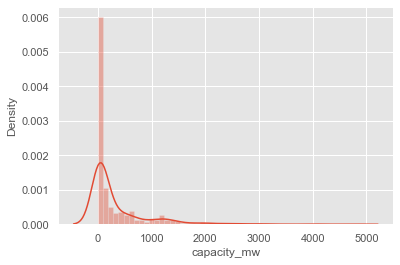

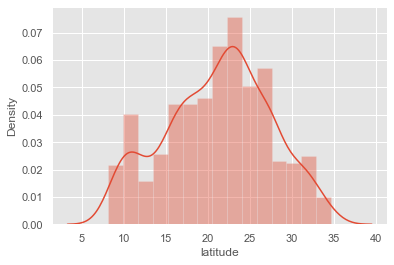

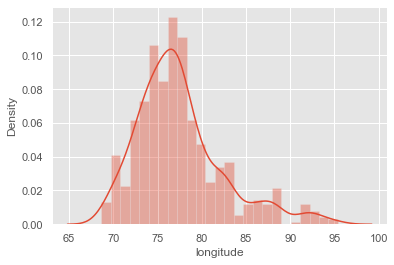

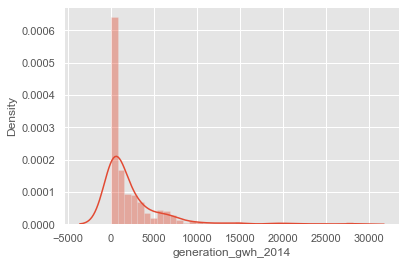

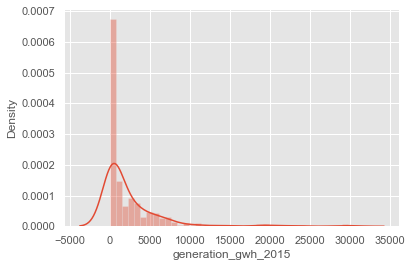

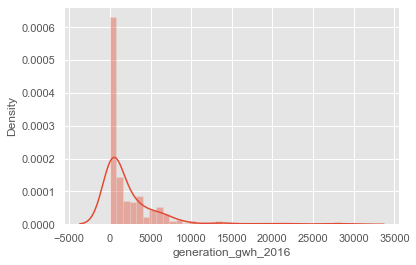

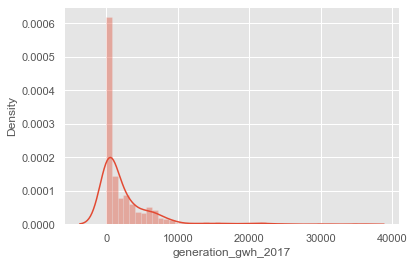

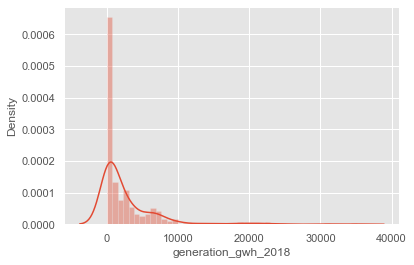

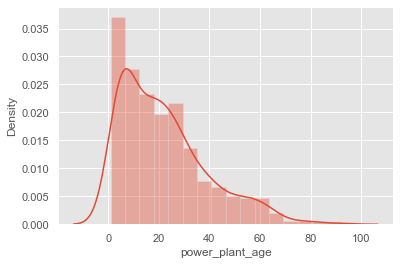

In [20]:
# Check Normality of continous data
for i in num.columns:
    sns.distplot(num[i])
    plt.show()

In [21]:
# replacing Nan values with mean and median for numerical variables.

num['latitude'] = num['latitude'].fillna(num['latitude'].mean())

for i in num.columns.difference(['latitude']):
    num[i]=num[i].fillna(num[i].median())

In [22]:
# check null values for numerical.
num.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
power_plant_age        0
dtype: int64

In [23]:
# check null values for categorical.
cat.isnull().sum()

primary_fuel            0
other_fuel1           709
source                  0
geolocation_source     19
dtype: int64

In [24]:
# replacing Nan values with mode for categorical variables.

for i in ['other_fuel1','geolocation_source']:
    cat[i]=cat[i].fillna(cat[i].mode()[0])

In [25]:
# check null values again.
cat.isnull().sum()

primary_fuel          0
other_fuel1           0
source                0
geolocation_source    0
dtype: int64

## EDA

#### --Univariate analysis--

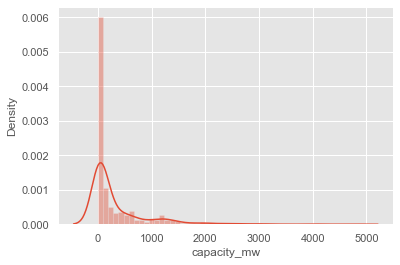

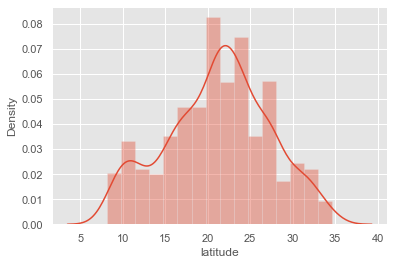

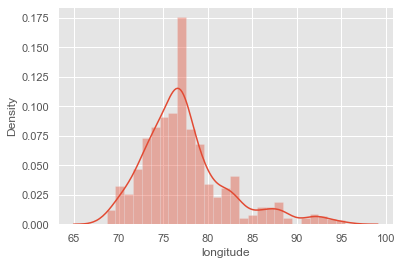

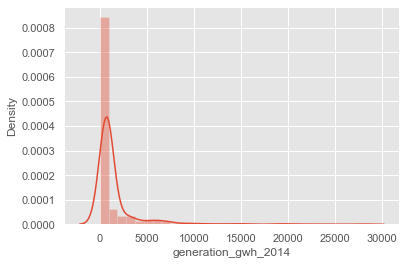

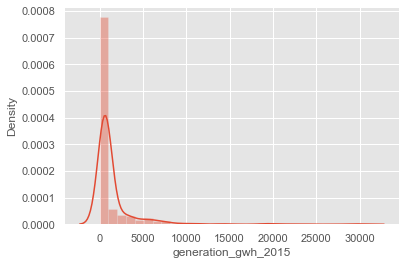

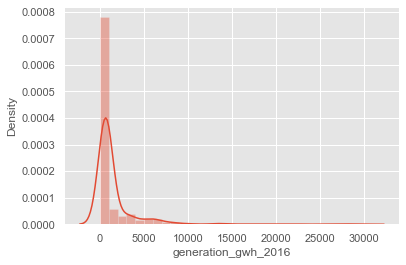

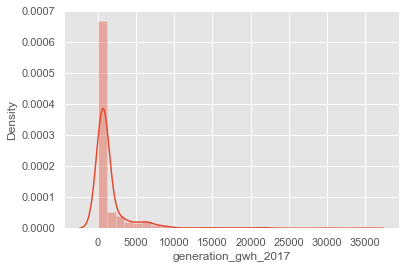

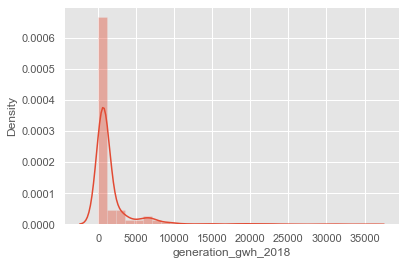

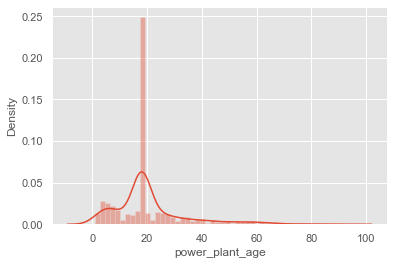

In [26]:
for i in num.columns:
    sns.distplot(num[i])
    plt.show()

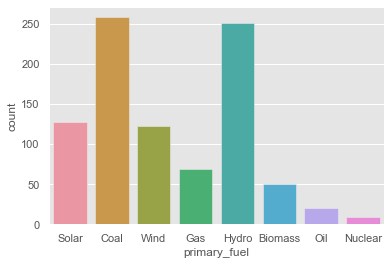

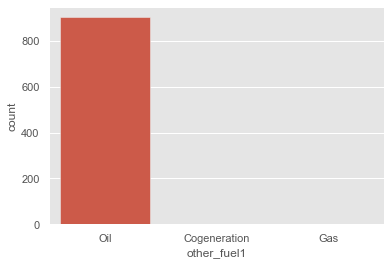

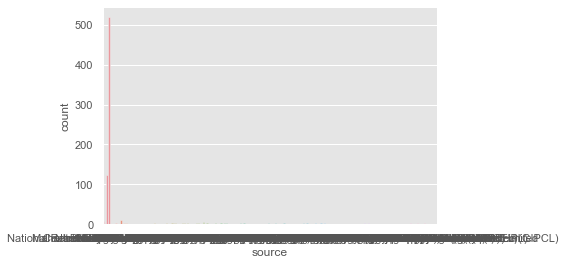

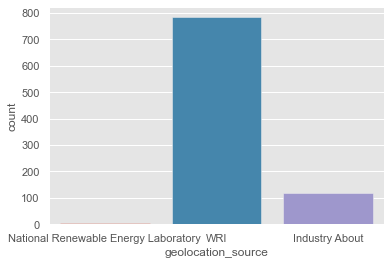

In [27]:
# Check count of categorical data
for i in cat.columns:
    sns.countplot(cat[i])
    plt.show()

#### --Bivariate analysis--

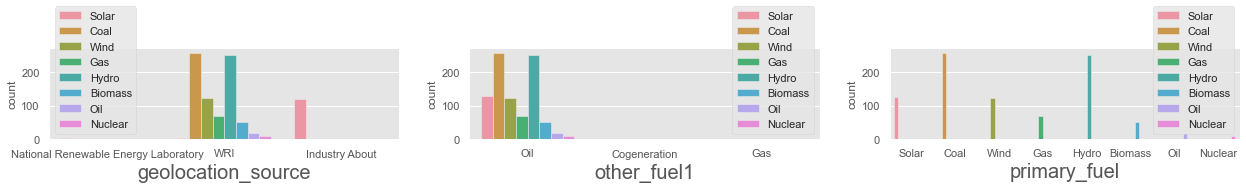

In [28]:
plt.figure(figsize=(300,100), facecolor='white')
plotnumber = 1

for i in cat.columns.difference(['source']):
    if plotnumber<=4 :
        ax = plt.subplot(50,40,plotnumber)
        sns.countplot(x=cat[i],hue=cat.primary_fuel,)
        plt.legend(loc='best')
        plt.xlabel(i,fontsize=20)
       
    plotnumber+=1
plt.show()

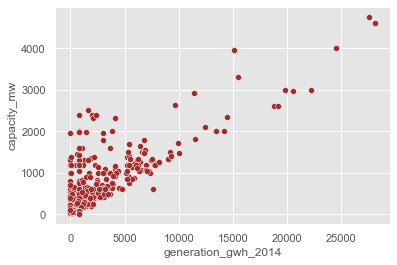

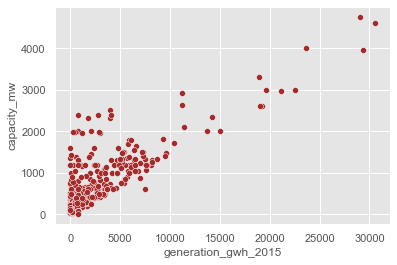

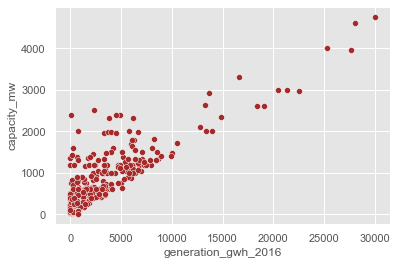

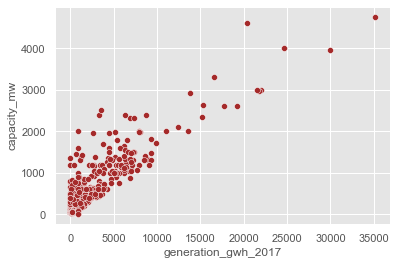

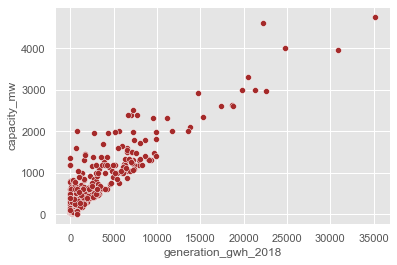

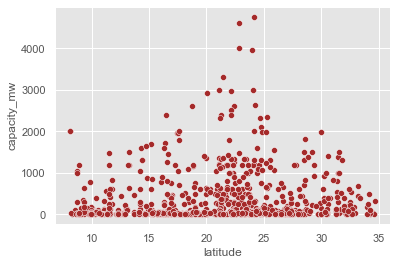

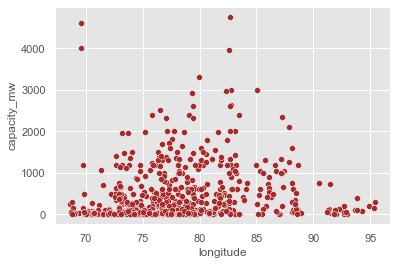

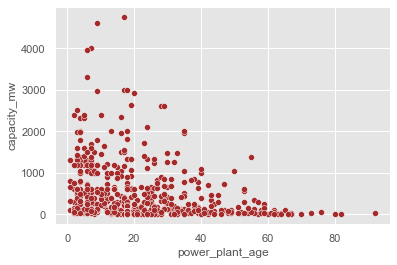

In [29]:
# taking capacity_mw as target

for i in num.columns.difference(['capacity_mw']):
    plt.figure()
    sns.scatterplot(x=num[i],y=num.capacity_mw,color='brown')

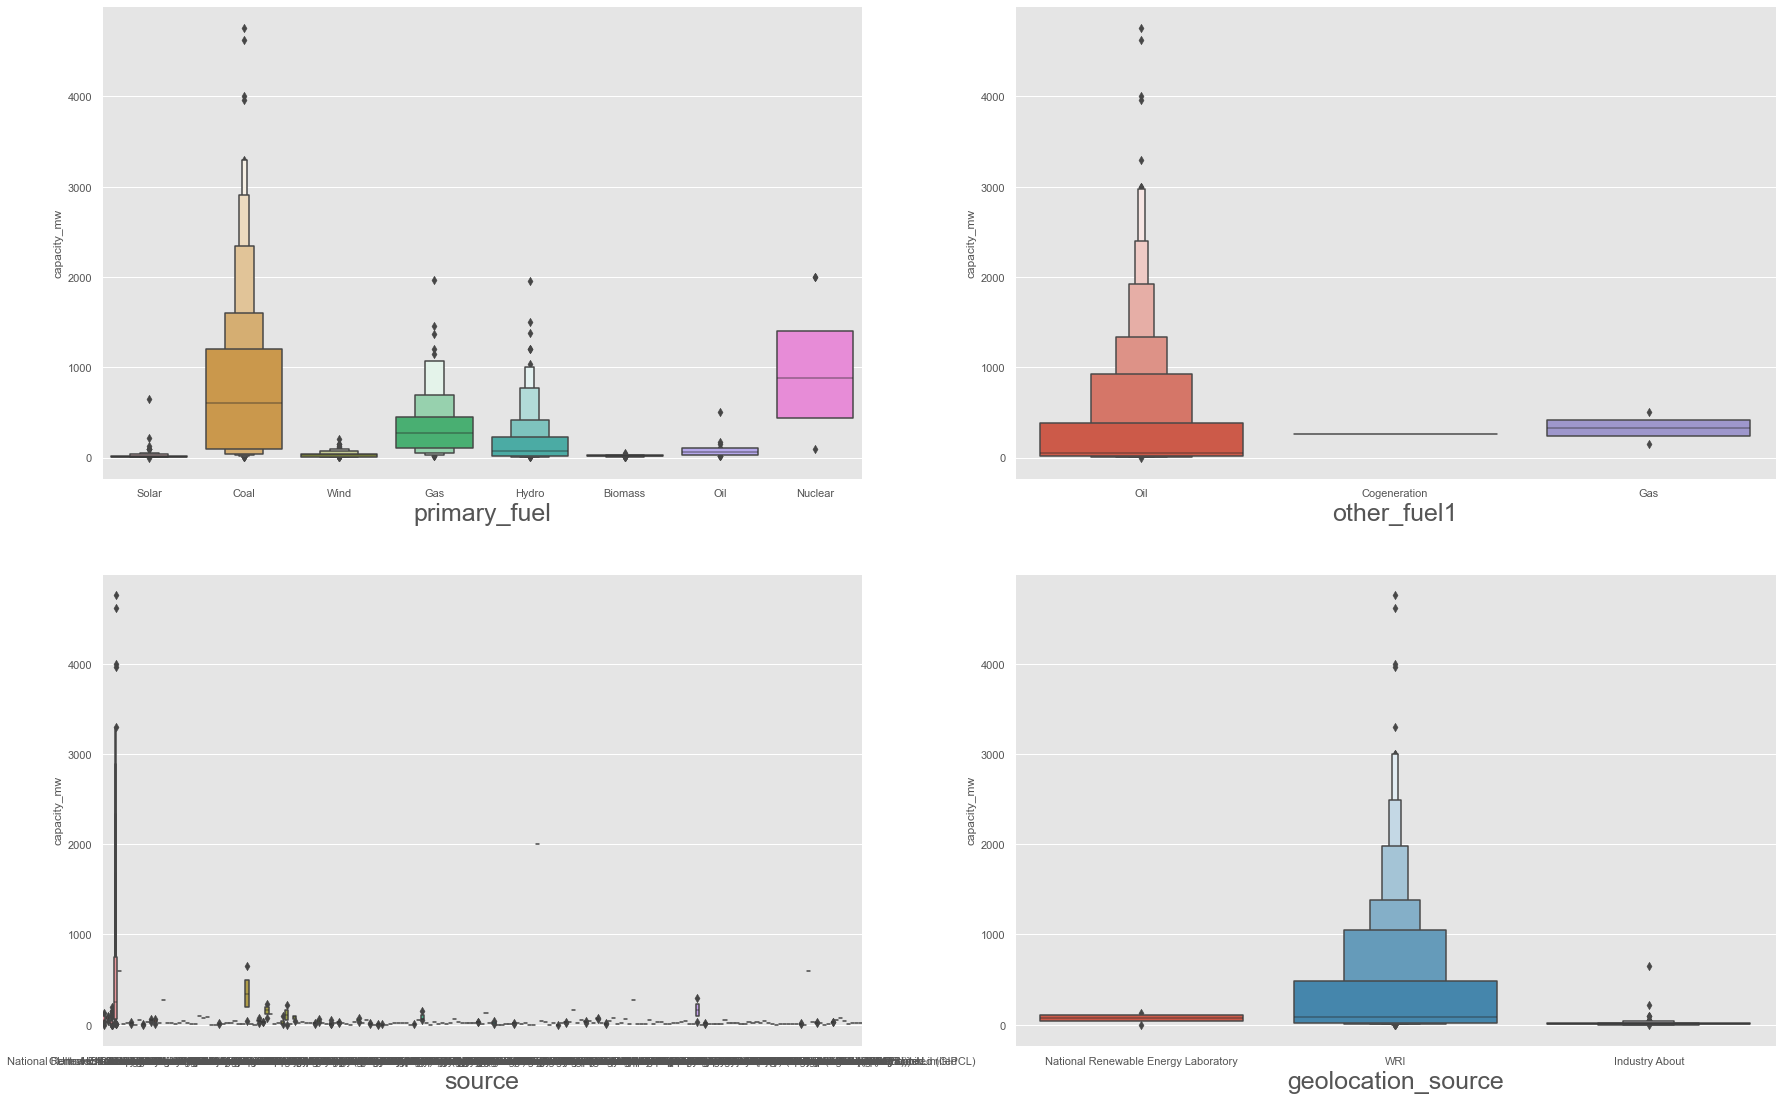

In [30]:
#relationship between Categorical columns and Target variable (capacity)

plt.figure(figsize=(30,40), facecolor='white')
plotnumber = 1

for i in cat.columns:
    if plotnumber<=24 :
        ax = plt.subplot(4,2,plotnumber)
        sns.boxenplot(x=cat[i],y=num.capacity_mw)
        plt.xlabel(i,fontsize=25)
       
    plotnumber+=1
plt.show()

In [31]:
# data for multivariate
df_eda=pd.concat([num,cat],axis=1)

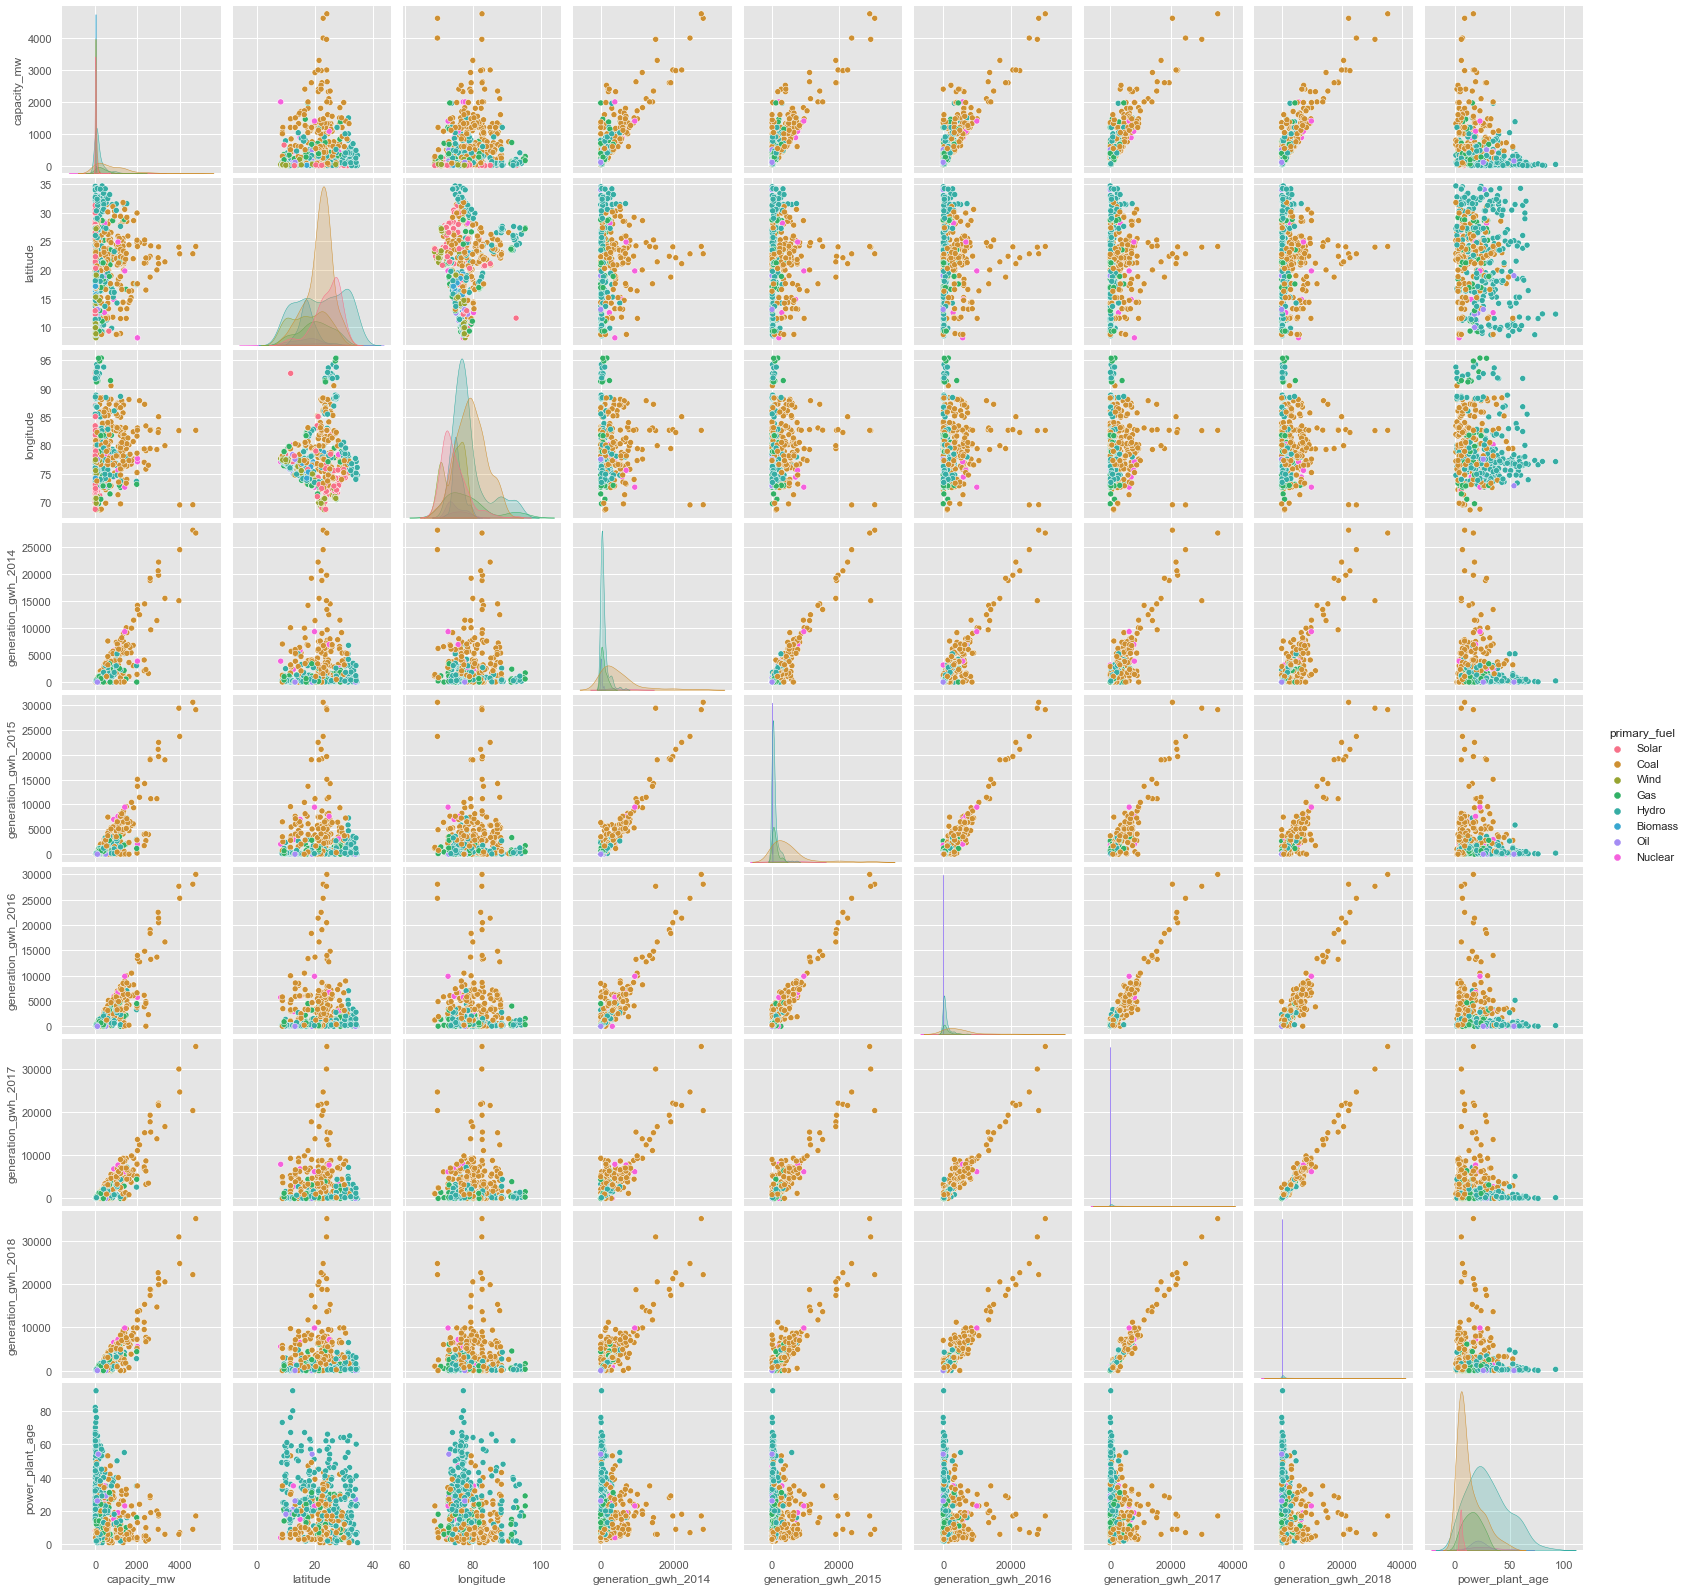

In [32]:
sns.pairplot(df,hue="primary_fuel")
plt.show()

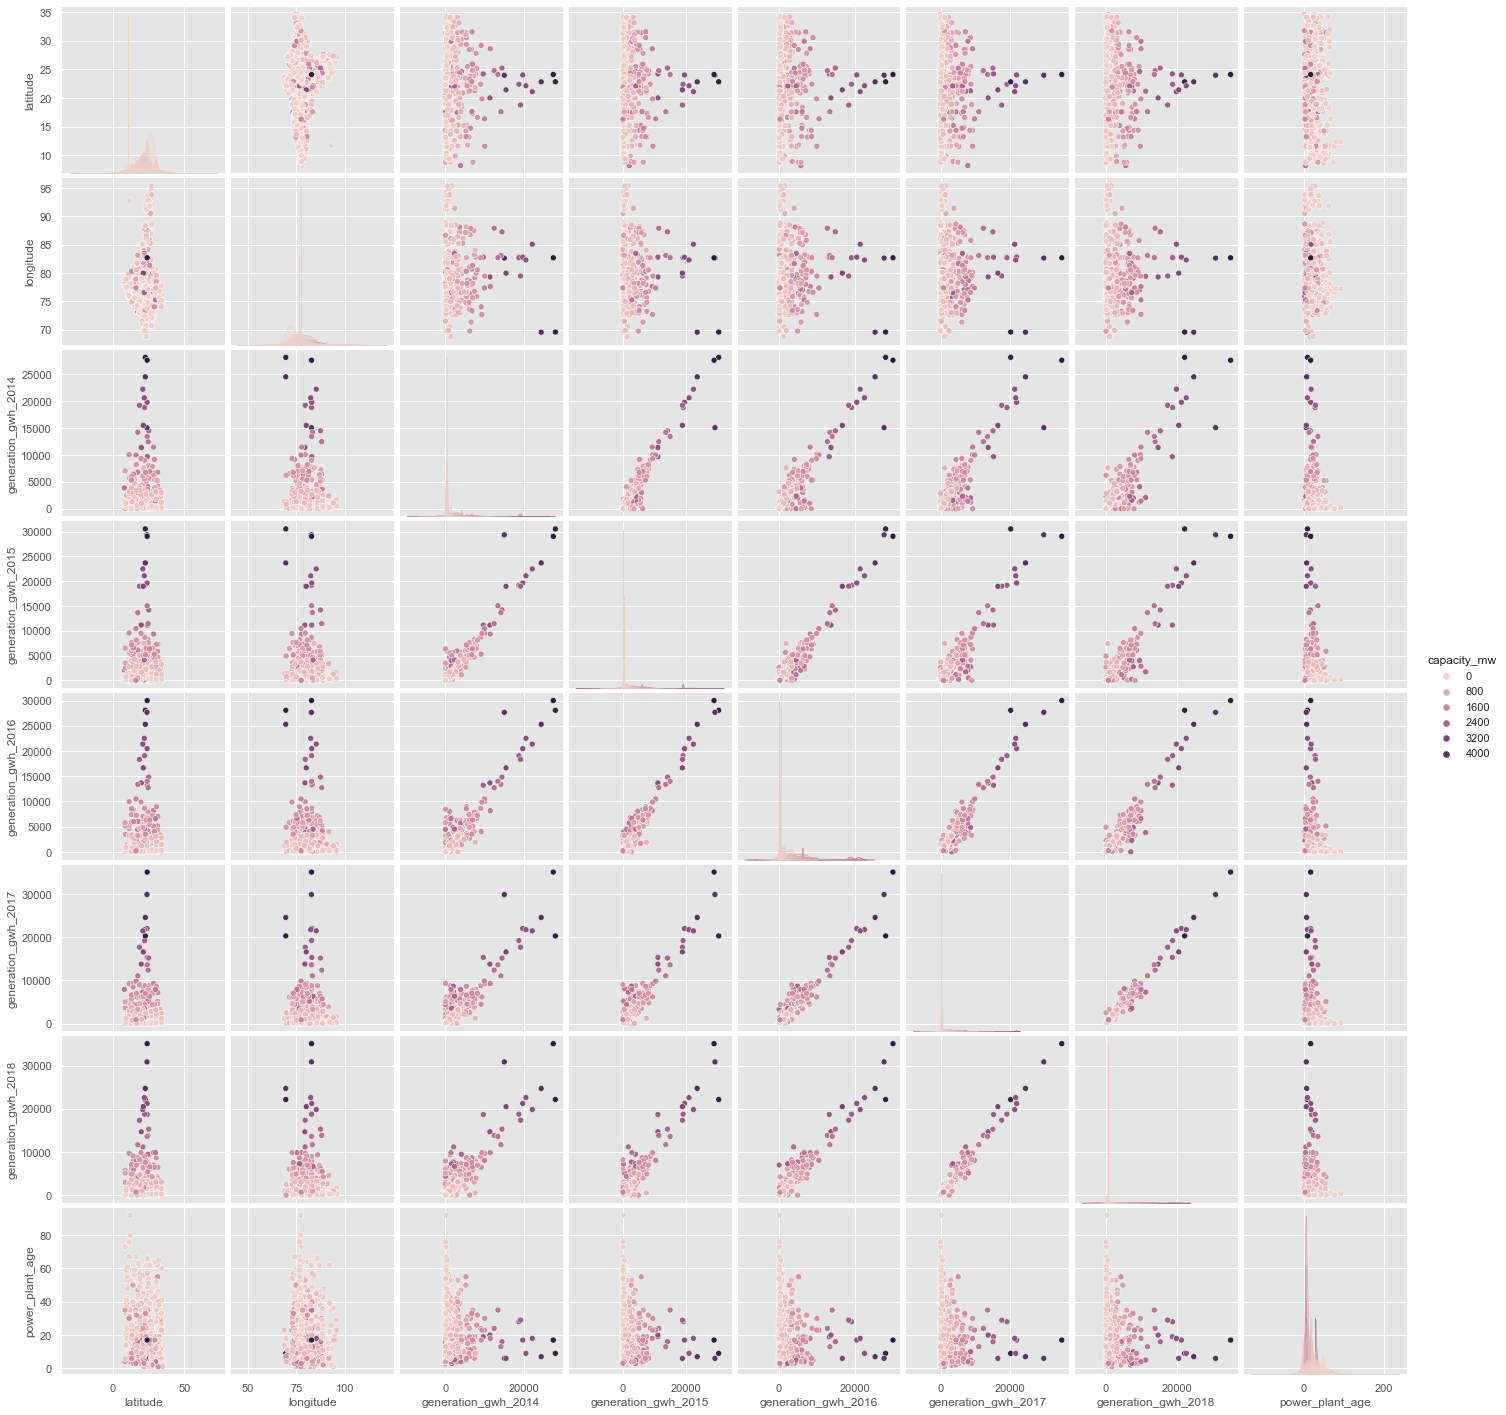

In [33]:
sns.pairplot(df,hue="capacity_mw")
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

### Outliers treatment

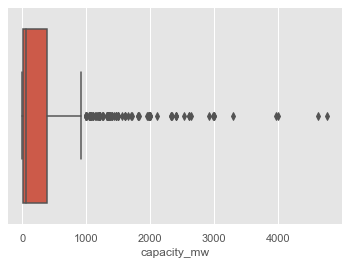

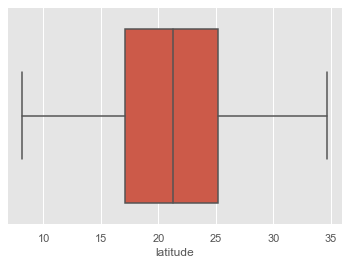

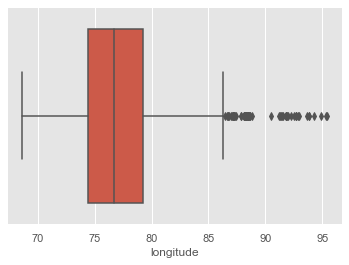

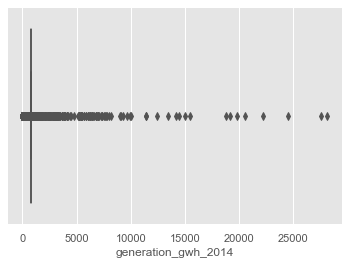

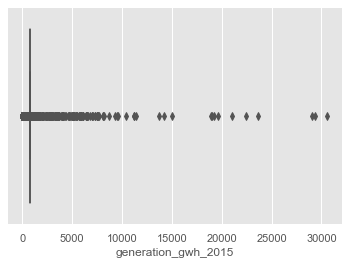

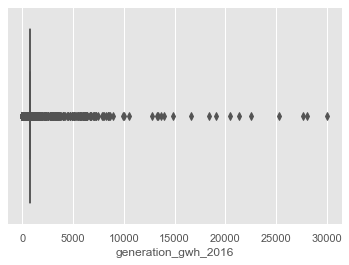

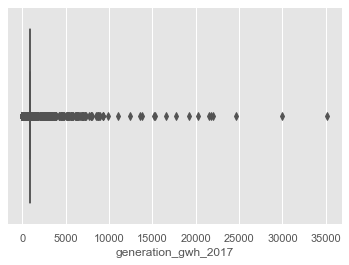

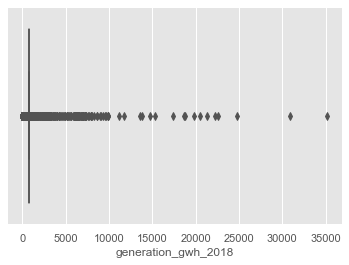

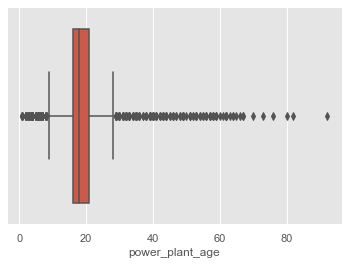

In [34]:
# Check outliers using boxplot
for col in num.columns:
    sns.boxplot(num[col])
    plt.show()

In [35]:
# use Z-score method
outliers=num[num.columns.difference(['latitude'])]
z=np.abs(zscore(outliers))
df_new=df_eda[(z<3).all(axis=1)]
df_new

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age,primary_fuel,other_fuel1,source,geolocation_source
0,2.5,28.1839,73.2407,801.123775,711.181225,737.205450,817.977250,751.644375,8.0,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,801.123775,711.181225,737.205450,817.977250,751.644375,18.0,Coal,Oil,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,801.123775,711.181225,737.205450,817.977250,751.644375,18.0,Wind,Oil,CDM,WRI
3,135.0,23.8712,91.3602,617.789264,843.747000,886.004428,663.774500,626.239128,15.0,Gas,Oil,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0,Coal,Oil,Central Electricity Authority,WRI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,801.123775,0.994875,233.596650,865.400000,686.500000,3.0,Coal,Oil,Central Electricity Authority,WRI
903,3.0,12.8932,78.1654,801.123775,711.181225,737.205450,817.977250,751.644375,18.0,Solar,Oil,Karnataka Power Corporation Limited,Industry About
904,25.5,15.2758,75.5811,801.123775,711.181225,737.205450,817.977250,751.644375,18.0,Wind,Oil,CDM,WRI
905,80.0,24.3500,73.7477,801.123775,711.181225,737.205450,817.977250,751.644375,18.0,Coal,Oil,Hindustan Zinc ltd,WRI


In [36]:
# data loss percentage

loss_percentage= ((num.shape[0]- df_new.shape[0])/num.shape[0])*100
loss_percentage

6.725468577728775

##### It's acceptable.

In [37]:
# Check Skewness
df_new.skew()

capacity_mw            1.992633
latitude              -0.118531
longitude              0.948983
generation_gwh_2014    2.961146
generation_gwh_2015    2.760332
generation_gwh_2016    2.699308
generation_gwh_2017    2.598081
generation_gwh_2018    2.663498
power_plant_age        1.288240
dtype: float64

In [38]:
# I'll consider -0.5/0.5 is ok among features skewness and treat the others features.

skew_cols=['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017',
          'generation_gwh_2018','power_plant_age']

In [39]:
# withing Power transformer to treat skewness
scaler = PowerTransformer()
df_new[skew_cols] = scaler.fit_transform(df_new[skew_cols].values)

In [40]:
# Encoding

# use getdummies for nominal features like; gelocation source and other fuel, while use ordinal encoder for target feature

# df_new=pd.get_dummies(df_new,columns=['other_fuel1','geolocation_source'],drop_first=True) not be used as later it shown me 

# ValueError: could not convert string to float: 'National Renewable Energy Laboratory'

#Encoding the target feature:

encode_cols=["primary_fuel","other_fuel1","source","geolocation_source"]


from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in encode_cols:
    df_new[i]=enc.fit_transform(df_new[i].values.reshape(-1,1))

In [41]:
df_new

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age,primary_fuel,other_fuel1,source,geolocation_source
0,-1.676116,28.1839,-0.918187,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,-1.108432,6.0,2.0,109.0,1.0
1,0.231634,24.7663,-0.496301,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,0.038773,1.0,2.0,174.0,2.0
2,-0.266730,21.9038,-2.373965,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,0.038773,7.0,2.0,21.0,2.0
3,0.404484,23.8712,2.426620,-0.263441,0.101715,0.111906,-0.191976,-0.186610,-0.257833,2.0,2.0,22.0,2.0
4,1.759489,21.9603,1.262372,1.432304,2.302682,2.301691,2.020971,2.412487,-1.788994,1.0,2.0,22.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1.699689,16.2949,0.234562,-0.038481,-2.461769,-0.842413,0.020775,-0.117460,-2.006394,1.0,2.0,22.0,2.0
903,-1.596709,12.8932,0.423902,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,0.038773,6.0,2.0,77.0,0.0
904,-0.501102,15.2758,-0.221151,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,0.038773,7.0,2.0,21.0,2.0
905,0.121668,24.3500,-0.756895,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,0.038773,1.0,2.0,59.0,2.0


-------------------------------------------------------------------------------------------------------------------------------

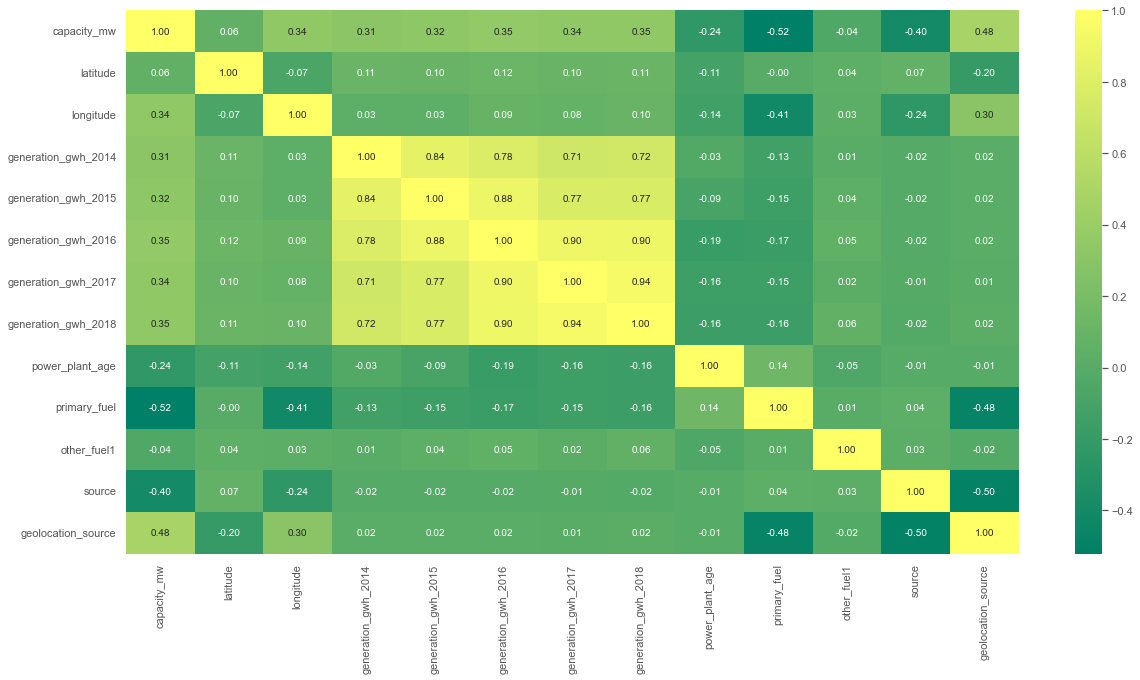

In [42]:
# heatmap correlation
plt.figure(figsize = (20,10))
sns.heatmap(df_new.corr(), annot=True,cmap='summer',fmt='.2f')
plt.show()

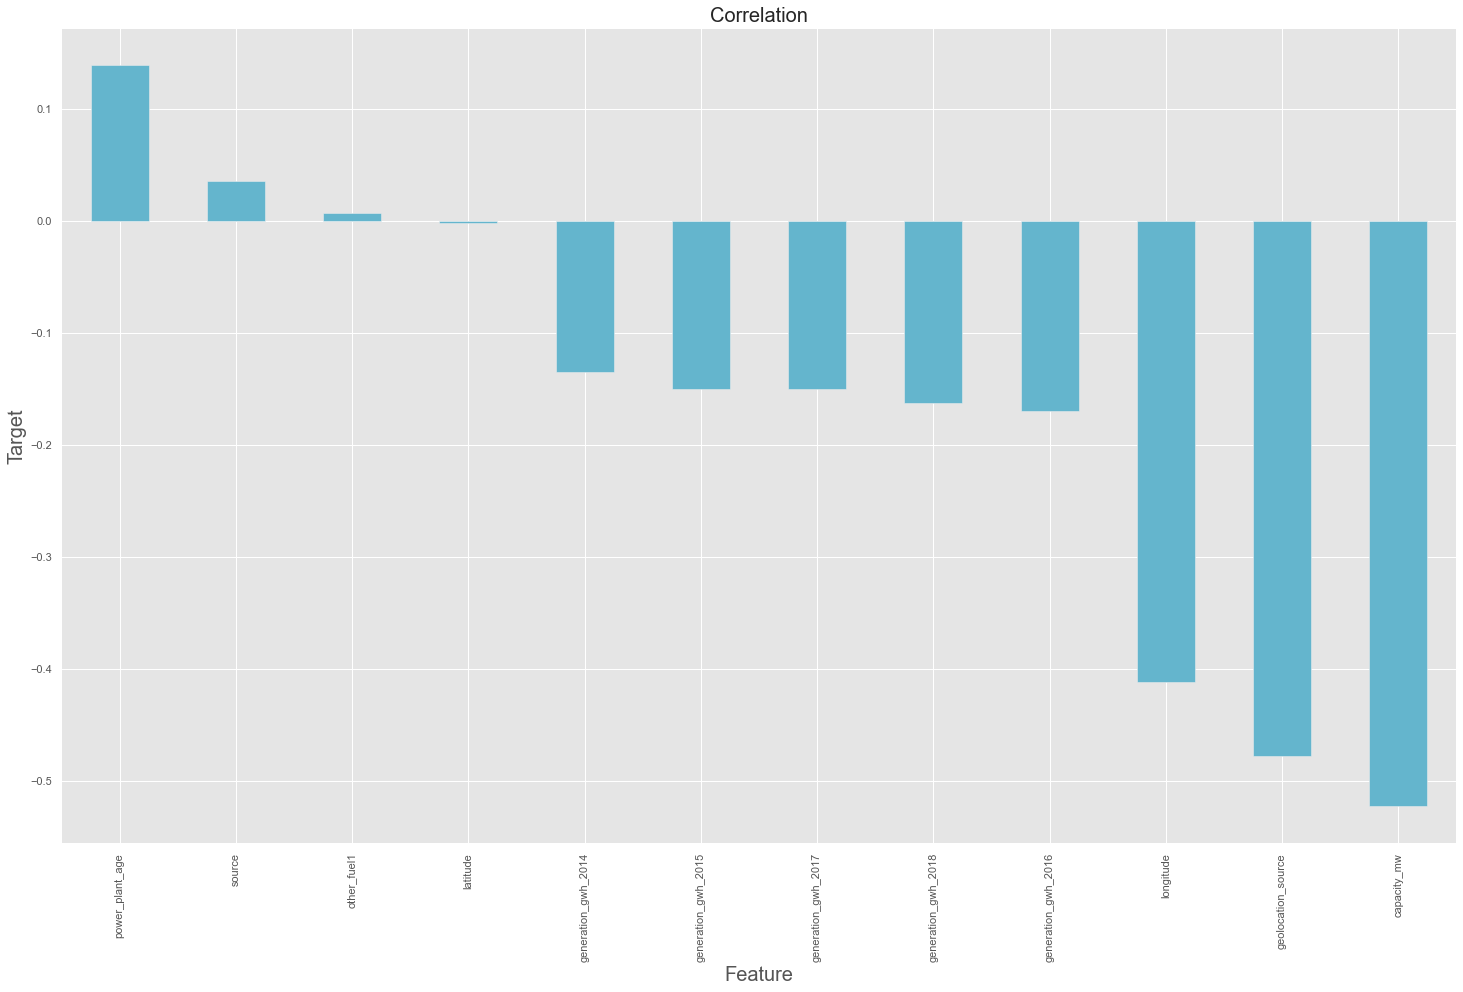

In [43]:
#Visualization of the Correlation Metrics
plt.figure(figsize = (25, 15))

df_new.corr()['primary_fuel'].sort_values(ascending = False).drop(['primary_fuel']).plot(kind = 'bar', color = 'c')

plt.xlabel('Feature', fontsize = 20)

plt.ylabel('Target', fontsize = 20)

plt.title('Correlation', fontsize = 20)

plt.show()

In [44]:
# From above insights;dropping the variables latitude and other_fuel1

df_new.drop(["other_fuel1","latitude"],axis=1,inplace=True)

In [45]:
df_new

,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age,primary_fuel,source,geolocation_source
0,-1.676116,-0.918187,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,-1.108432,6.0,109.0,1.0
1,0.231634,-0.496301,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,0.038773,1.0,174.0,2.0
2,-0.266730,-2.373965,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,0.038773,7.0,21.0,2.0
3,0.404484,2.426620,-0.263441,0.101715,0.111906,-0.191976,-0.186610,-0.257833,2.0,22.0,2.0
4,1.759489,1.262372,1.432304,2.302682,2.301691,2.020971,2.412487,-1.788994,1.0,22.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
902,1.699689,0.234562,-0.038481,-2.461769,-0.842413,0.020775,-0.117460,-2.006394,1.0,22.0,2.0
903,-1.596709,0.423902,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,0.038773,6.0,77.0,0.0
904,-0.501102,-0.221151,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,0.038773,7.0,21.0,2.0
905,0.121668,-0.756895,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,0.038773,1.0,59.0,2.0


In [46]:
#dataset shape
df_new.shape

(846, 11)

In [47]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 846 entries, 0 to 906

Data columns (total 11 columns):

 #   Column               Non-Null Count  Dtype  

---  ------               --------------  -----  

 0   capacity_mw          846 non-null    float64

 1   longitude            846 non-null    float64

 2   generation_gwh_2014  846 non-null    float64

 3   generation_gwh_2015  846 non-null    float64

 4   generation_gwh_2016  846 non-null    float64

 5   generation_gwh_2017  846 non-null    float64

 6   generation_gwh_2018  846 non-null    float64

 7   power_plant_age      846 non-null    float64

 8   primary_fuel         846 non-null    float64

 9   source               846 non-null    float64

 10  geolocation_source   846 non-null    float64

dtypes: float64(11)

memory usage: 79.3 KB


-------------------------------------------------------------------------------------------------------------------------------

## Classification of Problem

###  Treating the imblance in the present target data

In [48]:
#separating the dependent and independent variable for balancing the class
x = df_new[df_new.columns.difference(['primary_fuel'])]
y = df_new.primary_fuel

In [49]:
# It's time to dela with imbalance of the target withing SMOTE Technique.
from imblearn.over_sampling import SMOTE

smt = SMOTE()
x,y = smt.fit_resample(x,y)

6.0    233

1.0    233

7.0    233

2.0    233

3.0    233

0.0    233

5.0    233

4.0    233

Name: primary_fuel, dtype: int64


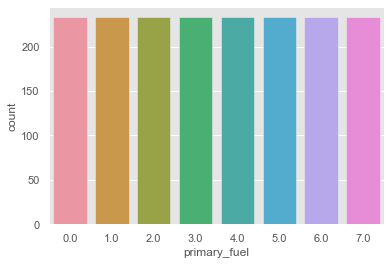

In [50]:
#Checking the count of primary_fuel

print(y.value_counts())
sns.countplot(y)
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

### Feature Reduction

##### Weight of evidence & information value

In [51]:
df_final=pd.concat([x,y],axis=1)

In [52]:
df_final

,capacity_mw,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,geolocation_source,longitude,power_plant_age,source,primary_fuel
0,-1.676116,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,1.0,-0.918187,-1.108432,109.0,6.0
1,0.231634,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,2.0,-0.496301,0.038773,174.0,1.0
2,-0.266730,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,2.0,-2.373965,0.038773,21.0,7.0
3,0.404484,-0.263441,0.101715,0.111906,-0.191976,-0.186610,2.0,2.426620,-0.257833,22.0,2.0
4,1.759489,1.432304,2.302682,2.301691,2.020971,2.412487,2.0,1.262372,-1.788994,22.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1859,-0.841951,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,2.0,0.305156,0.038773,21.0,7.0
1860,-0.274213,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,2.0,-2.119391,0.038773,21.0,7.0
1861,-1.256732,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,2.0,0.077573,0.038773,21.0,7.0
1862,-1.016939,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,2.0,0.290901,0.038773,21.0,7.0


In [53]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [54]:
for col in df_final.columns:
    if col == 'primary_fuel': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        df, iv = calculate_woe_iv(df_final, col, 'primary_fuel')
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: capacity_mw

IV score: 0.06





WoE and IV for column: generation_gwh_2014

IV score: 0.52





WoE and IV for column: generation_gwh_2015

IV score: 0.70





WoE and IV for column: generation_gwh_2016

IV score: 0.75





WoE and IV for column: generation_gwh_2017

IV score: 0.83





WoE and IV for column: generation_gwh_2018

IV score: 0.84





WoE and IV for column: geolocation_source

IV score: 0.00





WoE and IV for column: longitude

IV score: 0.00





WoE and IV for column: power_plant_age

IV score: 0.83





WoE and IV for column: source

IV score: 0.00






In [55]:
l_iv=['capacity_mw','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017'
      ,'generation_gwh_2018','power_plant_age']

### RFE

In [56]:
rfe = RFE(RandomForestClassifier(), n_features_to_select=5).fit(x,y)

In [57]:
l2_rfe = x.columns[rfe.get_support()]

In [58]:
l2_rfe

Index(['capacity_mw', 'generation_gwh_2014', 'longitude', 'power_plant_age', 'source'], dtype='object')

### SKB

In [59]:
SKB = SelectKBest(f_classif, k=5).fit(x, y )

In [60]:
l3_skb = x.columns[SKB.get_support()]

In [61]:
l3_skb

Index(['capacity_mw', 'generation_gwh_2014', 'generation_gwh_2018', 'geolocation_source',
       'source'],
      dtype='object')

In [62]:
list(set((l_iv)+list(l2_rfe)+list(l3_skb)))

['generation_gwh_2016',
 'generation_gwh_2018',
 'geolocation_source',
 'capacity_mw',
 'power_plant_age',
 'source',
 'generation_gwh_2015',
 'longitude',
 'generation_gwh_2014',
 'generation_gwh_2017']

In [63]:
final_list= ['generation_gwh_2014',
 'geolocation_source',
 'generation_gwh_2016',
 'generation_gwh_2015',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'longitude',
 'source',
 'power_plant_age',
 'capacity_mw']

### Standarization

In [64]:
sc= StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns = x.columns)
x

,capacity_mw,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,geolocation_source,longitude,power_plant_age,source
0,-1.796427,-0.049114,-0.012118,0.036816,0.010279,0.032426,-1.178136,-0.886180,-1.472771,1.207069
1,0.196765,-0.049114,-0.012118,0.036816,0.010279,0.032426,0.369841,-0.401073,-0.030061,2.548706
2,-0.323919,-0.049114,-0.012118,0.036816,0.010279,0.032426,0.369841,-2.560110,-0.030061,-0.609302
3,0.377356,-0.249718,0.115613,0.165728,-0.134918,-0.087791,0.369841,2.959858,-0.403069,-0.588662
4,1.793048,1.262428,2.075775,2.011893,1.798535,2.158222,0.369841,1.621144,-2.328636,-0.588662
...,...,...,...,...,...,...,...,...,...,...
1859,-0.924903,-0.049114,-0.012118,0.036816,0.010279,0.032426,0.369841,0.520485,-0.030061,-0.609302
1860,-0.331738,-0.049114,-0.012118,0.036816,0.010279,0.032426,0.369841,-2.267388,-0.030061,-0.609302
1861,-1.358260,-0.049114,-0.012118,0.036816,0.010279,0.032426,0.369841,0.258798,-0.030061,-0.609302
1862,-1.107728,-0.049114,-0.012118,0.036816,0.010279,0.032426,0.369841,0.504095,-0.030061,-0.609302


### VIF check Multicollinarity

In [65]:
x = x[final_list]
y = y

In [66]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [67]:
vif.sort_values(by='VIF_Factor', ascending=False, inplace=True)
vif

,VIF_Factor,features
2,14.456406,generation_gwh_2016
5,10.754867,generation_gwh_2018
3,10.236452,generation_gwh_2015
4,7.845620,generation_gwh_2017
0,5.968042,generation_gwh_2014
9,1.896304,capacity_mw
1,1.379921,geolocation_source
7,1.352395,source
6,1.167912,longitude
8,1.141898,power_plant_age


-------------------------------------------------------------------------------------------------------------------------------

## ML Alogs

In [69]:
# get best random state
lr=LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.2)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if (accuracy_score(pred_train,y_train)*100)>=(accuracy_score(y_test,pred_test)*100):
        print("At random state ",i," The model performs very well")
        print("Training accuracy_score is :",round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:",round(accuracy_score(y_test,pred_test)*100,1),  '\n\n')

At random state  0  The model performs very well

Training accuracy_score is : 71.9

Testing accuracy_score is: 67.8 





At random state  2  The model performs very well

Training accuracy_score is : 71.8

Testing accuracy_score is: 69.7 





At random state  4  The model performs very well

Training accuracy_score is : 72.4

Testing accuracy_score is: 70.5 





At random state  6  The model performs very well

Training accuracy_score is : 71.0

Testing accuracy_score is: 70.2 





At random state  9  The model performs very well

Training accuracy_score is : 71.0

Testing accuracy_score is: 68.9 





At random state  11  The model performs very well

Training accuracy_score is : 71.8

Testing accuracy_score is: 68.1 





At random state  13  The model performs very well

Training accuracy_score is : 72.1

Testing accuracy_score is: 68.9 





At random state  16  The model performs very well

Training accuracy_score is : 71.0

Testing accuracy_score is: 70.0 





At random sta

#### Split the data

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)

### Logistic Regression

In [72]:
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
score_acc=accuracy_score(y_test,pred_test)
print('Auc test: ',score_acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))

Auc test:  0.7158176943699732

Confusion Matrix:  

 [[40  0  0  0  0  0  0  4]

 [ 6 20  8  4 10  2  0  3]

 [ 1  7 20 10  3  6  0  1]

 [ 0  4  7 20  2  0  0  7]

 [ 0  1  6  0 43  0  0  0]

 [ 1  3  0  0  0 31  0  2]

 [ 0  2  0  0  0  0 45  0]

 [ 0  0  0  6  0  0  0 48]]

Classification Report:  

               precision    recall  f1-score   support



         0.0       0.83      0.91      0.87        44

         1.0       0.54      0.38      0.44        53

         2.0       0.49      0.42      0.45        48

         3.0       0.50      0.50      0.50        40

         4.0       0.74      0.86      0.80        50

         5.0       0.79      0.84      0.82        37

         6.0       1.00      0.96      0.98        47

         7.0       0.74      0.89      0.81        54



    accuracy                           0.72       373

   macro avg       0.70      0.72      0.71       373

weighted avg       0.70      0.72      0.70       373




#### Cross Validation

In [73]:
for i in range(3,11):
    cvs=cross_val_score(lr,x,y,cv=i)
    cvs_mean=cvs.mean()
    cvs_std=cvs.std()
    print ("At cv: ",i)
    print ("Cross validation score is : ",cvs_mean*100)
    print ("Cross validation score_std is : ", cvs_std*100)
    print ("Auc Score is : ",score_acc*100)
    print ("\n")

At cv:  3

Cross validation score is :  69.741867782317

Cross validation score_std is :  1.493713672150282

Auc Score is :  71.58176943699732





At cv:  4

Cross validation score is :  70.27896995708154

Cross validation score_std is :  1.8113672764092439

Auc Score is :  71.58176943699732





At cv:  5

Cross validation score is :  70.81466747383895

Cross validation score_std is :  0.9745020801599813

Auc Score is :  71.58176943699732





At cv:  6

Cross validation score is :  70.97465684749162

Cross validation score_std is :  1.6342905563959291

Auc Score is :  71.58176943699732





At cv:  7

Cross validation score is :  70.86858398001424

Cross validation score_std is :  2.707422311964627

Auc Score is :  71.58176943699732





At cv:  8

Cross validation score is :  70.54721030042919

Cross validation score_std is :  2.2397667108528

Auc Score is :  71.58176943699732





At cv:  9

Cross validation score is :  70.92339691977372

Cross validation score_std is :  1.8497811

-------------------------------------------------------------------------------------------------------------------------------

### Decision Tree

In [75]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_train=dtc.predict(x_train)
pred_test=dtc.predict(x_test)
score_acc=accuracy_score(y_test,pred_test)
print('Auc test: ',score_acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))
print('CV  : ',cross_val_score(dtc,x,y,cv=5).mean())

Auc test:  0.8793565683646113

Confusion Matrix:  

 [[43  1  0  0  0  0  0  0]

 [ 3 38  3  4  2  3  0  0]

 [ 0  6 38  1  0  3  0  0]

 [ 0  5  5 29  1  0  0  0]

 [ 0  1  2  0 47  0  0  0]

 [ 0  0  2  1  0 32  0  2]

 [ 0  0  0  0  0  0 47  0]

 [ 0  0  0  0  0  0  0 54]]

Classification Report:  

               precision    recall  f1-score   support



         0.0       0.93      0.98      0.96        44

         1.0       0.75      0.72      0.73        53

         2.0       0.76      0.79      0.78        48

         3.0       0.83      0.72      0.77        40

         4.0       0.94      0.94      0.94        50

         5.0       0.84      0.86      0.85        37

         6.0       1.00      1.00      1.00        47

         7.0       0.96      1.00      0.98        54



    accuracy                           0.88       373

   macro avg       0.88      0.88      0.88       373

weighted avg       0.88      0.88      0.88       373



CV  :  0.8572919369252501


-------------------------------------------------------------------------------------------------------------------------------

### SVM

In [76]:
svc=SVC()
svc.fit(x_train,y_train)
pred_train=svc.predict(x_train)
pred_test=svc.predict(x_test)
score_acc=accuracy_score(y_test,pred_test)
print('Auc test: ',score_acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))
print('CV  : ',cross_val_score(svc,x,y,cv=5).mean())

Auc test:  0.8150134048257373

Confusion Matrix:  

 [[40  0  0  0  0  0  0  4]

 [ 5 28  5  0  6  2  0  7]

 [ 0  4 32  0  5  6  0  1]

 [ 0  6  5 22  1  0  0  6]

 [ 0  0  0  0 50  0  0  0]

 [ 2  2  0  0  0 31  0  2]

 [ 0  0  0  0  0  0 47  0]

 [ 0  0  0  0  0  0  0 54]]

Classification Report:  

               precision    recall  f1-score   support



         0.0       0.85      0.91      0.88        44

         1.0       0.70      0.53      0.60        53

         2.0       0.76      0.67      0.71        48

         3.0       1.00      0.55      0.71        40

         4.0       0.81      1.00      0.89        50

         5.0       0.79      0.84      0.82        37

         6.0       1.00      1.00      1.00        47

         7.0       0.73      1.00      0.84        54



    accuracy                           0.82       373

   macro avg       0.83      0.81      0.81       373

weighted avg       0.82      0.82      0.81       373



CV  :  0.8036351581192885


-------------------------------------------------------------------------------------------------------------------------------

### Ensembles Techniques

### Random Forest Classifier

In [77]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_train=rfc.predict(x_train)
pred_test=rfc.predict(x_test)
score_acc=accuracy_score(y_test,pred_test)
print('Auc test: ',score_acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))
print('CV  : ',cross_val_score(rfc,x,y,cv=5).mean())

Auc test:  0.903485254691689

Confusion Matrix:  

 [[44  0  0  0  0  0  0  0]

 [ 5 36  4  4  2  2  0  0]

 [ 0  5 41  0  0  2  0  0]

 [ 0  5  4 31  0  0  0  0]

 [ 0  0  0  0 50  0  0  0]

 [ 0  2  0  1  0 34  0  0]

 [ 0  0  0  0  0  0 47  0]

 [ 0  0  0  0  0  0  0 54]]

Classification Report:  

               precision    recall  f1-score   support



         0.0       0.90      1.00      0.95        44

         1.0       0.75      0.68      0.71        53

         2.0       0.84      0.85      0.85        48

         3.0       0.86      0.78      0.82        40

         4.0       0.96      1.00      0.98        50

         5.0       0.89      0.92      0.91        37

         6.0       1.00      1.00      1.00        47

         7.0       1.00      1.00      1.00        54



    accuracy                           0.90       373

   macro avg       0.90      0.90      0.90       373

weighted avg       0.90      0.90      0.90       373



CV  :  0.9109429502147653


-------------------------------------------------------------------------------------------------------------------------------

### GBC

In [78]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_train=gbc.predict(x_train)
pred_test=gbc.predict(x_test)
score_acc=accuracy_score(y_test,pred_test)
print('Auc test: ',score_acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))
print('CV  : ',cross_val_score(gbc,x,y,cv=5).mean())

Auc test:  0.8927613941018767

Confusion Matrix:  

 [[44  0  0  0  0  0  0  0]

 [ 4 36  3  3  4  3  0  0]

 [ 0  3 41  2  0  2  0  0]

 [ 0  4  5 30  1  0  0  0]

 [ 0  1  0  0 49  0  0  0]

 [ 0  0  1  1  0 33  0  2]

 [ 0  1  0  0  0  0 46  0]

 [ 0  0  0  0  0  0  0 54]]

Classification Report:  

               precision    recall  f1-score   support



         0.0       0.92      1.00      0.96        44

         1.0       0.80      0.68      0.73        53

         2.0       0.82      0.85      0.84        48

         3.0       0.83      0.75      0.79        40

         4.0       0.91      0.98      0.94        50

         5.0       0.87      0.89      0.88        37

         6.0       1.00      0.98      0.99        47

         7.0       0.96      1.00      0.98        54



    accuracy                           0.89       373

   macro avg       0.89      0.89      0.89       373

weighted avg       0.89      0.89      0.89       373



CV  :  0.9018175790596443


-------------------------------------------------------------------------------------------------------------------------------

### XGBoost

In [79]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
pred_train=xgb.predict(x_train)
pred_test=xgb.predict(x_test)
score_acc=accuracy_score(y_test,pred_test)
print('Auc test: ',score_acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))
print('CV  : ',cross_val_score(xgb,x,y,cv=5).mean())

Auc test:  0.8981233243967829

Confusion Matrix:  

 [[43  1  0  0  0  0  0  0]

 [ 4 34  1  6  4  3  0  1]

 [ 0  5 41  1  0  1  0  0]

 [ 0  4  1 34  1  0  0  0]

 [ 0  0  0  0 50  0  0  0]

 [ 0  1  0  1  0 33  0  2]

 [ 0  1  0  0  0  0 46  0]

 [ 0  0  0  0  0  0  0 54]]

Classification Report:  

               precision    recall  f1-score   support



         0.0       0.91      0.98      0.95        44

         1.0       0.74      0.64      0.69        53

         2.0       0.95      0.85      0.90        48

         3.0       0.81      0.85      0.83        40

         4.0       0.91      1.00      0.95        50

         5.0       0.89      0.89      0.89        37

         6.0       1.00      0.98      0.99        47

         7.0       0.95      1.00      0.97        54



    accuracy                           0.90       373

   macro avg       0.90      0.90      0.90       373

weighted avg       0.90      0.90      0.90       373



CV  :  0.9216711349419123


##### will choose XGBooost classifer as it have accuray score 90% on test data with 92% CV mean.

-------------------------------------------------------------------------------------------------------------------------------

#### Hyperparameter Tuning 

In [84]:
# tunning XGBClassifier

param_xgb={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[50,100,250,500,700],'max_depth':[3,5,7,9],'subsample':[0.7,0.9],
           'colsample_bytree':[0.6,0.8,0.9],'min_child_weight':range(1,6,2)}

xgb_model=GridSearchCV(XGBClassifier(),param_xgb,cv=5,n_jobs=-1,scoring='accuracy',verbose=True).fit(x_train,y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


In [85]:
xgb_model.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 700,
 'subsample': 0.7}

In [86]:
xgb_model.best_score_

0.9101254741756639

In [87]:
xgb_model_final=XGBClassifier(learning_rate=0.1,n_estimators=700,max_depth=7,min_child_weight= 1,subsample= 0.7,
                              colsample_bytree=0.9,random_state=14).fit(x_train,y_train)

In [88]:
pred_train=xgb_model_final.predict(x_train)
pred_test=xgb_model_final.predict(x_test)
score_acc=accuracy_score(y_test,pred_test)
print('Auc test: ',score_acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred_test))
print('Classification Report: ','\n',classification_report(y_test,pred_test))
print('CV  : ',cross_val_score(xgb_model_final,x,y,cv=5).mean())

Auc test:  0.8900804289544236

Confusion Matrix:  

 [[43  1  0  0  0  0  0  0]

 [ 4 31  4  5  5  3  0  1]

 [ 0  5 41  1  0  1  0  0]

 [ 0  4  2 33  1  0  0  0]

 [ 0  0  0  0 50  0  0  0]

 [ 0  1  1  1  0 33  0  1]

 [ 0  0  0  0  0  0 47  0]

 [ 0  0  0  0  0  0  0 54]]

Classification Report:  

               precision    recall  f1-score   support



         0.0       0.91      0.98      0.95        44

         1.0       0.74      0.58      0.65        53

         2.0       0.85      0.85      0.85        48

         3.0       0.82      0.82      0.82        40

         4.0       0.89      1.00      0.94        50

         5.0       0.89      0.89      0.89        37

         6.0       1.00      1.00      1.00        47

         7.0       0.96      1.00      0.98        54



    accuracy                           0.89       373

   macro avg       0.89      0.89      0.89       373

weighted avg       0.88      0.89      0.89       373



CV  :  0.9248897344979676


-------------------------------------------------------------------------------------------------------------------------------

## Saving Model

In [89]:
#Saving the model using .pkl
import joblib
joblib.dump(xgb_model_final,"GPP.pkl")

['GPP.pkl']

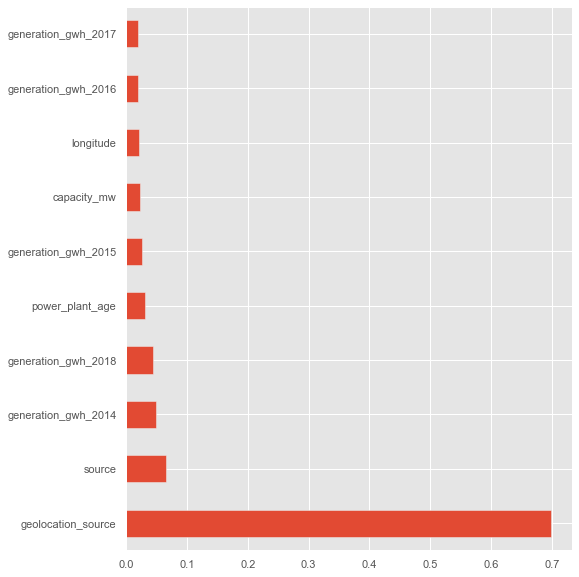

In [91]:
#Checking Feature Importance with XGBoost Model

feat_importances = pd.Series(xgb_model_final.feature_importances_, index=x.columns)
feat_importances.nlargest(100).plot(kind='barh',figsize=(8,10))
plt.show()

In [92]:
# load model and get predictions

model=joblib.load('GPP.pkl')

#Predict

prediction = model.predict(x_test)

prediction

array([6, 1, 3, 7, 7, 3, 6, 7, 7, 1, 4, 1, 4, 7, 5, 2, 7, 1, 7, 4, 1, 7,
       3, 0, 3, 4, 5, 2, 2, 4, 1, 4, 6, 1, 7, 4, 3, 4, 3, 6, 5, 4, 5, 1,
       3, 4, 5, 0, 0, 3, 6, 1, 4, 7, 7, 5, 1, 3, 1, 0, 5, 6, 1, 2, 3, 7,
       0, 5, 3, 6, 5, 5, 6, 4, 6, 4, 0, 7, 0, 3, 2, 2, 2, 2, 6, 6, 7, 4,
       3, 4, 0, 6, 3, 6, 5, 0, 4, 0, 6, 4, 4, 5, 4, 7, 3, 1, 2, 6, 2, 0,
       2, 2, 3, 7, 5, 4, 2, 7, 2, 3, 5, 4, 1, 4, 7, 2, 0, 6, 1, 7, 7, 4,
       6, 2, 2, 7, 7, 0, 3, 5, 2, 4, 4, 0, 0, 2, 4, 3, 2, 3, 3, 2, 4, 1,
       3, 0, 6, 1, 2, 6, 0, 4, 1, 7, 0, 7, 7, 0, 7, 5, 3, 3, 2, 7, 0, 2,
       0, 3, 0, 4, 0, 6, 4, 1, 2, 3, 0, 5, 6, 4, 1, 6, 0, 7, 6, 4, 1, 7,
       7, 6, 7, 3, 4, 1, 4, 7, 2, 2, 4, 6, 6, 6, 4, 5, 7, 6, 6, 7, 4, 2,
       5, 1, 0, 7, 1, 2, 6, 7, 7, 2, 1, 4, 0, 4, 3, 0, 4, 7, 5, 5, 6, 5,
       0, 0, 0, 7, 2, 7, 1, 3, 7, 5, 4, 6, 1, 5, 4, 4, 4, 6, 7, 6, 7, 7,
       0, 6, 7, 0, 4, 5, 3, 7, 7, 4, 1, 3, 5, 2, 6, 2, 0, 1, 3, 4, 3, 0,
       2, 4, 6, 2, 2, 1, 3, 6, 2, 6, 0, 7, 2, 6, 5,

In [93]:
pd.DataFrame([model.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Original'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372
Predicted,6.0,1.0,3.0,7.0,7.0,3.0,6.0,7.0,7.0,1.0,4.0,1.0,4.0,7.0,5.0,2.0,7.0,1.0,7.0,4.0,1.0,7.0,3.0,0.0,3.0,4.0,5.0,2.0,2.0,4.0,1.0,4.0,6.0,1.0,7.0,4.0,3.0,4.0,3.0,6.0,5.0,4.0,5.0,1.0,3.0,4.0,5.0,0.0,0.0,3.0,6.0,1.0,4.0,7.0,7.0,5.0,1.0,3.0,1.0,0.0,5.0,6.0,1.0,2.0,3.0,7.0,0.0,5.0,3.0,6.0,5.0,5.0,6.0,4.0,6.0,4.0,0.0,7.0,0.0,3.0,2.0,2.0,2.0,2.0,6.0,6.0,7.0,4.0,3.0,4.0,0.0,6.0,3.0,6.0,5.0,0.0,4.0,0.0,6.0,4.0,4.0,5.0,4.0,7.0,3.0,1.0,2.0,6.0,2.0,0.0,2.0,2.0,3.0,7.0,5.0,4.0,2.0,7.0,2.0,3.0,5.0,4.0,1.0,4.0,7.0,2.0,0.0,6.0,1.0,7.0,7.0,4.0,6.0,2.0,2.0,7.0,7.0,0.0,3.0,5.0,2.0,4.0,4.0,0.0,0.0,2.0,4.0,3.0,2.0,3.0,3.0,2.0,4.0,1.0,3.0,0.0,6.0,1.0,2.0,6.0,0.0,4.0,1.0,7.0,0.0,7.0,7.0,0.0,7.0,5.0,3.0,3.0,2.0,7.0,0.0,2.0,0.0,3.0,0.0,4.0,0.0,6.0,4.0,1.0,2.0,3.0,0.0,5.0,6.0,4.0,1.0,6.0,0.0,7.0,6.0,4.0,1.0,7.0,7.0,6.0,7.0,3.0,4.0,1.0,4.0,7.0,2.0,2.0,4.0,6.0,6.0,6.0,4.0,5.0,7.0,6.0,6.0,7.0,4.0,2.0,5.0,1.0,0.0,7.0,1.0,2.0,6.0,7.0,7.0,2.0,1.0,4.0,0.0,4.0,3.0,0.0,4.0,7.0,5.0,5.0,6.0,5.0,0.0,0.0,0.0,7.0,2.0,7.0,1.0,3.0,7.0,5.0,4.0,6.0,1.0,5.0,4.0,4.0,4.0,6.0,7.0,6.0,7.0,7.0,0.0,6.0,7.0,0.0,4.0,5.0,3.0,7.0,7.0,4.0,1.0,3.0,5.0,2.0,6.0,2.0,0.0,1.0,3.0,4.0,3.0,0.0,2.0,4.0,6.0,2.0,2.0,1.0,3.0,6.0,2.0,6.0,0.0,7.0,2.0,6.0,5.0,3.0,1.0,7.0,2.0,6.0,0.0,5.0,2.0,1.0,4.0,5.0,6.0,7.0,2.0,2.0,4.0,6.0,7.0,2.0,4.0,0.0,2.0,7.0,1.0,3.0,0.0,5.0,0.0,5.0,5.0,2.0,3.0,6.0,0.0,4.0,6.0,3.0,5.0,1.0,2.0,1.0,1.0,3.0,4.0,0.0,5.0,0.0,2.0,7.0,1.0,0.0,2.0,1.0,6.0,4.0,6.0,3.0,7.0,4.0,1.0,5.0,1.0,5.0,1.0,7.0,4.0,1.0,0.0,5.0,7.0,0.0,0.0
Original,6.0,1.0,3.0,7.0,7.0,3.0,6.0,7.0,7.0,1.0,4.0,1.0,4.0,7.0,5.0,2.0,7.0,1.0,7.0,4.0,1.0,7.0,1.0,0.0,3.0,4.0,1.0,2.0,2.0,4.0,1.0,4.0,6.0,1.0,7.0,4.0,3.0,4.0,3.0,6.0,5.0,4.0,5.0,3.0,3.0,3.0,5.0,0.0,0.0,3.0,6.0,1.0,4.0,7.0,7.0,5.0,1.0,1.0,1.0,0.0,5.0,6.0,1.0,2.0,3.0,7.0,0.0,5.0,3.0,6.0,5.0,5.0,6.0,4.0,6.0,4.0,0.0,7.0,0.0,3.0,2.0,2.0,2.0,2.0,6.0,6.0,7.0,4.0,3.0,4.0,0.0,6.0,3.0,6.0,5.0,0.0,4.0,0.0,6.0,4.0,1.0,2.0,4.0,7.0,2.0,1.0,2.0,6.0,2.0,0.0,2.0,2.0,3.0,7.0,5.0,4.0,2.0,7.0,2.0,3.0,5.0,4.0,0.0,4.0,7.0,2.0,0.0,6.0,3.0,7.0,7.0,4.0,6.0,3.0,5.0,7.0,7.0,0.0,5.0,5.0,2.0,4.0,4.0,0.0,0.0,2.0,4.0,3.0,1.0,3.0,3.0,2.0,4.0,2.0,1.0,1.0,6.0,1.0,2.0,6.0,1.0,4.0,1.0,7.0,0.0,7.0,7.0,1.0,7.0,5.0,3.0,3.0,2.0,7.0,0.0,3.0,0.0,3.0,0.0,4.0,0.0,6.0,4.0,1.0,2.0,3.0,0.0,5.0,6.0,4.0,1.0,6.0,0.0,5.0,6.0,1.0,1.0,7.0,7.0,6.0,7.0,3.0,1.0,3.0,4.0,7.0,2.0,2.0,1.0,6.0,6.0,6.0,4.0,5.0,7.0,6.0,6.0,7.0,4.0,2.0,5.0,2.0,0.0,1.0,2.0,2.0,6.0,7.0,7.0,2.0,1.0,4.0,0.0,4.0,3.0,0.0,4.0,7.0,5.0,5.0,6.0,5.0,0.0,0.0,0.0,7.0,2.0,7.0,5.0,3.0,7.0,1.0,4.0,6.0,1.0,5.0,4.0,4.0,4.0,6.0,7.0,6.0,7.0,7.0,0.0,6.0,7.0,0.0,4.0,5.0,3.0,7.0,7.0,4.0,1.0,3.0,5.

-------------------------------------------------------------------------------------------------------------------------------

## Regression Problem

In [99]:
# use Z-score method
outliers=num[num.columns.difference(['latitude'])]
z=np.abs(zscore(outliers))
df_new=df_eda[(z<3).all(axis=1)]
df_new

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age,primary_fuel,other_fuel1,source,geolocation_source
0,2.5,28.1839,73.2407,801.123775,711.181225,737.205450,817.977250,751.644375,8.0,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,801.123775,711.181225,737.205450,817.977250,751.644375,18.0,Coal,Oil,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,801.123775,711.181225,737.205450,817.977250,751.644375,18.0,Wind,Oil,CDM,WRI
3,135.0,23.8712,91.3602,617.789264,843.747000,886.004428,663.774500,626.239128,15.0,Gas,Oil,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0,Coal,Oil,Central Electricity Authority,WRI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,801.123775,0.994875,233.596650,865.400000,686.500000,3.0,Coal,Oil,Central Electricity Authority,WRI
903,3.0,12.8932,78.1654,801.123775,711.181225,737.205450,817.977250,751.644375,18.0,Solar,Oil,Karnataka Power Corporation Limited,Industry About
904,25.5,15.2758,75.5811,801.123775,711.181225,737.205450,817.977250,751.644375,18.0,Wind,Oil,CDM,WRI
905,80.0,24.3500,73.7477,801.123775,711.181225,737.205450,817.977250,751.644375,18.0,Coal,Oil,Hindustan Zinc ltd,WRI


In [100]:
# I'll consider -0.5/0.5 is ok among features skewness and treat the others features.

skew_cols=['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017',
          'generation_gwh_2018','power_plant_age']

In [101]:
# withing Power transformer to treat skewness
scaler = PowerTransformer()
df_new[skew_cols] = scaler.fit_transform(df_new[skew_cols].values)

In [102]:
# Encoding

# use getdummies for nominal features

encode_cols=['primary_fuel','other_fuel1','geolocation_source']

df_new=pd.get_dummies(df_new,columns=encode_cols,drop_first=True) 

In [103]:
df_new

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age,source,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind,other_fuel1_Gas,other_fuel1_Oil,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,-1.676116,28.1839,-0.918187,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,-1.108432,National Renewable Energy Laboratory,0,0,0,0,0,1,0,0,1,1,0
1,0.231634,24.7663,-0.496301,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,0.038773,Ultratech Cement ltd,1,0,0,0,0,0,0,0,1,0,1
2,-0.266730,21.9038,-2.373965,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,0.038773,CDM,0,0,0,0,0,0,1,0,1,0,1
3,0.404484,23.8712,2.426620,-0.263441,0.101715,0.111906,-0.191976,-0.186610,-0.257833,Central Electricity Authority,0,1,0,0,0,0,0,0,1,0,1
4,1.759489,21.9603,1.262372,1.432304,2.302682,2.301691,2.020971,2.412487,-1.788994,Central Electricity Authority,1,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1.699689,16.2949,0.234562,-0.038481,-2.461769,-0.842413,0.020775,-0.117460,-2.006394,Central Electricity Authority,1,0,0,0,0,0,0,0,1,0,1
903,-1.596709,12.8932,0.423902,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,0.038773,Karnataka Power Corporation Limited,0,0,0,0,0,1,0,0,1,0,0
904,-0.501102,15.2758,-0.221151,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,0.038773,CDM,0,0,0,0,0,0,1,0,1,0,1
905,0.121668,24.3500,-0.756895,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,0.038773,Hindustan Zinc ltd,1,0,0,0,0,0,0,0,1,0,1


In [104]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

df_new['source']=enc.fit_transform(df_new['source'].values.reshape(-1,1))

In [105]:
df_new.head()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age,source,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Oil,primary_fuel_Solar,primary_fuel_Wind,other_fuel1_Gas,other_fuel1_Oil,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,-1.676116,28.1839,-0.918187,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,-1.108432,109.0,0,0,0,0,0,1,0,0,1,1,0
1,0.231634,24.7663,-0.496301,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,0.038773,174.0,1,0,0,0,0,0,0,0,1,0,1
2,-0.266730,21.9038,-2.373965,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,0.038773,21.0,0,0,0,0,0,0,1,0,1,0,1
3,0.404484,23.8712,2.426620,-0.263441,0.101715,0.111906,-0.191976,-0.186610,-0.257833,22.0,0,1,0,0,0,0,0,0,1,0,1
4,1.759489,21.9603,1.262372,1.432304,2.302682,2.301691,2.020971,2.412487,-1.788994,22.0,1,0,0,0,0,0,0,0,1,0,1


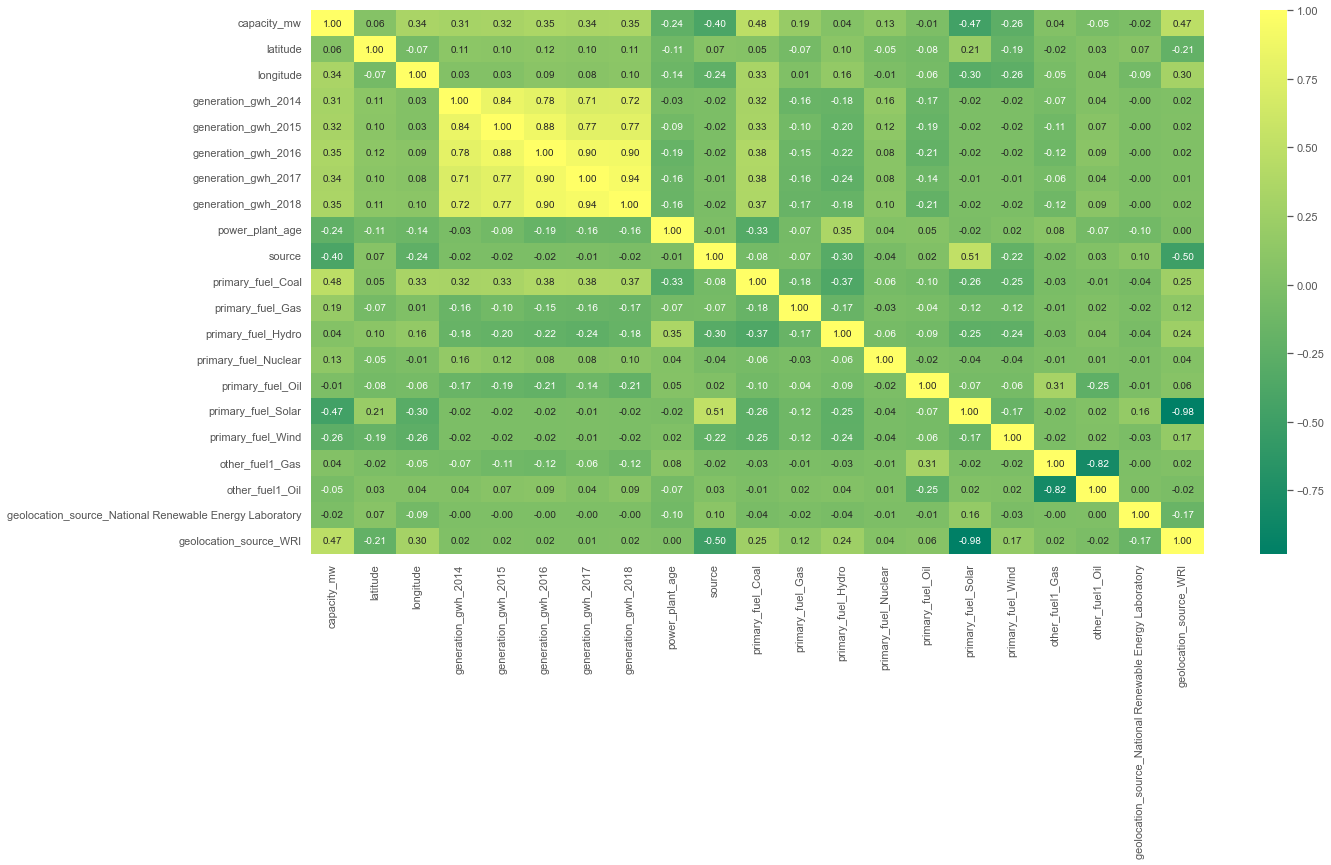

In [106]:
# heatmap correlation
plt.figure(figsize = (20,10))
sns.heatmap(df_new.corr(), annot=True,cmap='summer',fmt='.2f')
plt.show()

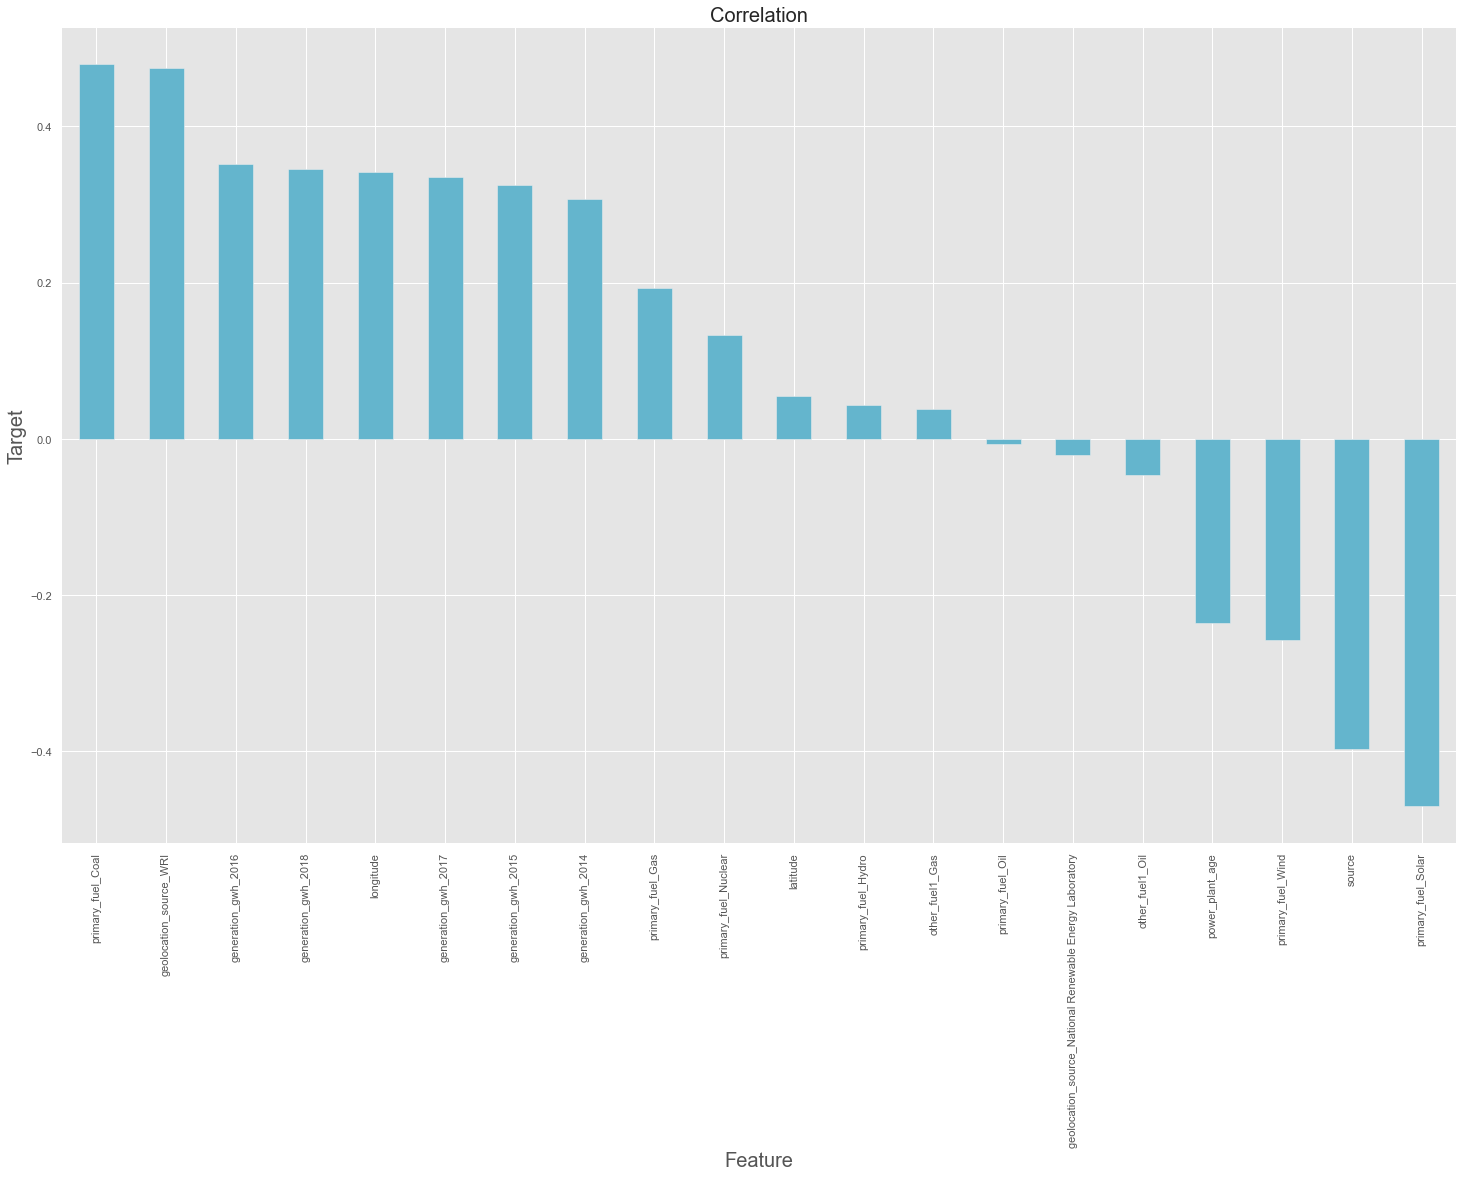

In [108]:
#Visualization of the Correlation Metrics
plt.figure(figsize = (25, 15))

df_new.corr()['capacity_mw'].sort_values(ascending = False).drop(['capacity_mw']).plot(kind = 'bar', color = 'c')

plt.xlabel('Feature', fontsize = 20)

plt.ylabel('Target', fontsize = 20)

plt.title('Correlation', fontsize = 20)

plt.show()

In [109]:
# From above insights;dropping the variables latitude and other_fuel1

df_new.drop(['primary_fuel_Oil','geolocation_source_National Renewable Energy Laboratory'],axis=1,inplace=True)

In [110]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 846 entries, 0 to 906

Data columns (total 19 columns):

 #   Column                  Non-Null Count  Dtype  

---  ------                  --------------  -----  

 0   capacity_mw             846 non-null    float64

 1   latitude                846 non-null    float64

 2   longitude               846 non-null    float64

 3   generation_gwh_2014     846 non-null    float64

 4   generation_gwh_2015     846 non-null    float64

 5   generation_gwh_2016     846 non-null    float64

 6   generation_gwh_2017     846 non-null    float64

 7   generation_gwh_2018     846 non-null    float64

 8   power_plant_age         846 non-null    float64

 9   source                  846 non-null    float64

 10  primary_fuel_Coal       846 non-null    uint8  

 11  primary_fuel_Gas        846 non-null    uint8  

 12  primary_fuel_Hydro      846 non-null    uint8  

 13  primary_fuel_Nuclear    846 non-null    uint8  

 14  primary_fuel_Solar     

-------------------------------------------------------------------------------------------------------------------------------

In [173]:
# capacity_mw is the target feature now.
x = df_new.drop("capacity_mw",axis=1)
y = df_new["capacity_mw"]

### Feature Reduction

#### RFE

In [174]:
rfe = RFE(LinearRegression(), n_features_to_select=7).fit(x,y)

In [175]:
l1_rfe = x.columns[rfe.get_support()]

In [176]:
l1_rfe

Index(['generation_gwh_2017', 'primary_fuel_Coal', 'primary_fuel_Gas', 'primary_fuel_Hydro',
       'primary_fuel_Nuclear', 'other_fuel1_Gas', 'geolocation_source_WRI'],
      dtype='object')

#### F-regression

In [177]:
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(x, y )

In [178]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(x.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [179]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value']).head(10)

In [180]:
f_reg_results

,Variable,F_Value,P_Value
8,source,157.843482,0.000
14,primary_fuel_Wind,59.914148,0.000
13,primary_fuel_Solar,238.904159,0.000
12,primary_fuel_Nuclear,15.056034,0.000
10,primary_fuel_Gas,32.664318,0.000
9,primary_fuel_Coal,251.828699,0.000
7,power_plant_age,49.819435,0.000
17,geolocation_source_WRI,245.127259,0.000
5,generation_gwh_2017,107.259047,0.000
4,generation_gwh_2016,119.432040,0.000


In [181]:
l2_fr=f_reg_results['Variable'].values  # CI=0.9

In [182]:
l2_fr

array(['source', 'primary_fuel_Wind', 'primary_fuel_Solar',
       'primary_fuel_Nuclear', 'primary_fuel_Gas', 'primary_fuel_Coal',
       'power_plant_age', 'geolocation_source_WRI', 'generation_gwh_2017',
       'generation_gwh_2016'], dtype=object)

### SKB

In [183]:
SKB = SelectKBest(f_classif, k=7).fit(x, y )

In [184]:
l3_skb = x.columns[SKB.get_support()]

In [185]:
l3_skb

Index(['generation_gwh_2014', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'primary_fuel_Gas', 'primary_fuel_Nuclear', 'primary_fuel_Wind'],
      dtype='object')

In [186]:
list(set(list(l1_rfe)+list(l2_fr)+list(l3_skb)))

['primary_fuel_Wind',
 'primary_fuel_Gas',
 'generation_gwh_2016',
 'primary_fuel_Coal',
 'generation_gwh_2014',
 'generation_gwh_2018',
 'primary_fuel_Solar',
 'other_fuel1_Gas',
 'geolocation_source_WRI',
 'primary_fuel_Nuclear',
 'power_plant_age',
 'source',
 'primary_fuel_Hydro',
 'generation_gwh_2017']

In [187]:
final_list= ['primary_fuel_Wind',
 'primary_fuel_Gas',
 'generation_gwh_2016',
 'primary_fuel_Coal',
 'generation_gwh_2014',
 'generation_gwh_2018',
 'primary_fuel_Solar',
 'other_fuel1_Gas',
 'geolocation_source_WRI',
 'primary_fuel_Nuclear',
 'power_plant_age',
 'source',
 'primary_fuel_Hydro',
 'generation_gwh_2017']

### Standarization

In [188]:
sc= StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns = x.columns)
x

,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age,source,primary_fuel_Coal,primary_fuel_Gas,primary_fuel_Hydro,primary_fuel_Nuclear,primary_fuel_Solar,primary_fuel_Wind,other_fuel1_Gas,other_fuel1_Oil,geolocation_source_WRI
0,1.162213,-0.918187,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,-1.108432,1.391906,-0.616521,-0.288490,-0.592822,-0.103695,2.390457,-0.412461,-0.048679,0.059655,-2.436068
1,0.601048,-0.496301,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,0.038773,2.812646,1.622005,-0.288490,-0.592822,-0.103695,-0.418330,-0.412461,-0.048679,0.059655,0.410498
2,0.131029,-2.373965,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,0.038773,-0.531557,-0.616521,-0.288490,-0.592822,-0.103695,-0.418330,2.424469,-0.048679,0.059655,0.410498
3,0.454073,2.426620,-0.263441,0.101715,0.111906,-0.191976,-0.186610,-0.257833,-0.509699,-0.616521,3.466321,-0.592822,-0.103695,-0.418330,-0.412461,-0.048679,0.059655,0.410498
4,0.140306,1.262373,1.432304,2.302682,2.301691,2.020971,2.412487,-1.788994,-0.509699,1.622005,-0.288490,-0.592822,-0.103695,-0.418330,-0.412461,-0.048679,0.059655,0.410498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,-0.789946,0.234562,-0.038481,-2.461769,-0.842413,0.020775,-0.117460,-2.006394,-0.509699,1.622005,-0.288490,-0.592822,-0.103695,-0.418330,-0.412461,-0.048679,0.059655,0.410498
842,-1.348501,0.423902,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,0.038773,0.692465,-0.616521,-0.288490,-0.592822,-0.103695,2.390457,-0.412461,-0.048679,0.059655,-2.436068
843,-0.957281,-0.221150,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,0.038773,-0.531557,-0.616521,-0.288490,-0.592822,-0.103695,-0.418330,2.424469,-0.048679,0.059655,0.410498
844,0.532692,-0.756895,-0.038481,-0.041708,-0.041000,-0.025789,-0.047495,0.038773,0.299030,1.622005,-0.288490,-0.592822,-0.103695,-0.418330,-0.412461,-0.048679,0.059655,0.410498


#### VIF check Multicollinarity

In [189]:
x = x[final_list]
y = y

In [190]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [191]:
vif.sort_values(by='VIF_Factor', ascending=False, inplace=True)
vif

,VIF_Factor,features
6,28.913326,primary_fuel_Solar
8,27.387333,geolocation_source_WRI
13,10.290062,generation_gwh_2017
5,9.611375,generation_gwh_2018
2,7.734881,generation_gwh_2016
12,4.213958,primary_fuel_Hydro
3,4.011990,primary_fuel_Coal
0,2.992472,primary_fuel_Wind
4,2.799964,generation_gwh_2014
1,2.038584,primary_fuel_Gas


-------------------------------------------------------------------------------------------------------------------------------

### ML Algos

In [195]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

The max accuracy is 0.6785854530468749 seen for random state: 96


##### split the data

In [197]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=96)

In [202]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
score_train=r2_score(y_train,pred_train)
score_test=r2_score(y_test,pred_test)
mse = mean_squared_error(y_test, pred_test)
print('R2_Score_train: ',score_train)
print('R2_Score_test: ',score_test)
print('RMSE = ', np.sqrt(mse).round(4))

R2_Score_train:  0.5736345305096089

R2_Score_test:  0.6785854530468749

RMSE =  0.5904


#### Cross Validation

-------------------------------------------------------------------------------------------------------------------------------

In [206]:
#Creating list of models and another list mapped to their names
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
models=[KNeighborsRegressor(),SVR(),LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

names=['KNeighborsRegressor','SVR','LinearRegression','Lasso','Ridge','DecisionTreeRegressor',
       'RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor']

In [215]:
def createmodels(model_list,independent,dependent,n):
    xtrain,xtest,ytrain,ytest=train_test_split(independent,dependent,test_size=0.2,random_state=96)
    name=[]
    meanabs=[]
    rootmeansqd=[]
    r2=[]
    mcv=[]
    
    #Creating models
    for i,model in enumerate(model_list):
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        score=cross_val_score(model,independent,dependent,cv=3)
        
        #Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p,ytest),4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p,ytest)),4))
        r2.append(np.round(r2_score(p,ytest),2))
        mcv.append(np.round(np.mean(score),4))
    
    #Creating Dataframe
    data=pd.DataFrame()
    data['Model']=name
    data['Mean Absolute Error']=meanabs
    data['Root Mean Squared Error']=rootmeansqd
    data['R2 Score']=r2
    data['Mean of Cross validaton Score']=mcv
    data.set_index('Model',inplace = True)
    return data

In [216]:
createmodels(models,x,y,names)

,Mean Absolute Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,
KNeighborsRegressor,0.3696,0.5235,6.600000e-01,0.7214
SVR,0.4071,0.5433,6.500000e-01,0.7112
LinearRegression,0.4778,0.5904,4.700000e-01,0.5778
Lasso,0.9123,1.0730,-2.391331e+34,-0.0080
Ridge,0.4780,0.5904,4.700000e-01,0.5783
DecisionTreeRegressor,0.4014,0.5505,6.900000e-01,0.7240
RandomForestRegressor,0.3195,0.4356,7.900000e-01,0.7735
AdaBoostRegressor,0.3541,0.4729,7.100000e-01,0.7438
GradientBoostingRegressor,0.3458,0.4855,7.200000e-01,0.7824


-------------------------------------------------------------------------------------------------------------------------------

##### Randomforest Regressor is the best model with r2=79% and CV= 77.8%

#### #HyperParameter Tuning

In [217]:
# Tunning for Random Forest Regressor

from sklearn.model_selection import RandomizedSearchCV

params={'criterion': ["squared_error", "absolute_error", "poisson"],
            'n_estimators':[100,200,300,400],
            'max_depth': [5,6,7,8,10,30],
            'max_features':['sqrt','log2','auto'],
            'bootstrap': [True, False]}

rfr=RandomizedSearchCV(RandomForestRegressor(),params,scoring='r2',
                     cv =3, n_iter = 10, n_jobs=-1)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print('The r2 score is:', r2_score(y_test, y_pred))
print("\n The best estimator across ALL searched params:\n", rfr.best_estimator_)
print("\n The best score across ALL searched params:\n", rfr.best_score_)
print("\n The best parameters across ALL searched params:\n",rfr.best_params_)

The r2 score is: 0.8181880981187082



 The best estimator across ALL searched params:

 RandomForestRegressor(max_depth=7, max_features='log2', n_estimators=200)



 The best score across ALL searched params:

 0.7878461649412568



 The best parameters across ALL searched params:

 {'n_estimators': 200, 'max_features': 'log2', 'max_depth': 7, 'criterion': 'squared_error', 'bootstrap': True}


In [218]:
rfr_model = RandomForestRegressor(max_depth=7,max_features='log2',bootstrap= True,
                            criterion='squared_error',n_estimators=200)
rfr_model.fit(x_train,y_train)
pred = rfr_model.predict(x_test)
print('The r2 score is:', r2_score(y_test, pred))
print('The mean absolute error', mean_absolute_error(y_test, pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,pred)))

The r2 score is: 0.8181488487821157

The mean absolute error 0.32098253891225675

root_mean_squared_error: 0.4441227102735138


### Saving the Model

In [219]:
#Saving the model using .pkl
import joblib
joblib.dump(rfr_model,'GPG_reg.pkl')

['GPG_reg.pkl']

In [220]:
# load model and get predictions

model=joblib.load('GPG_reg.pkl')

#Predict

prediction = model.predict(x_test)

prediction

array([ 0.40217381, -0.61222036,  1.21055772,  0.21560749, -1.09346479,
        1.43959589, -0.88594855,  1.19249553, -1.33545965, -1.54054442,
        1.6229167 , -1.13968968,  1.23872806,  1.54749648, -0.61222036,
        1.54117623, -0.89318459,  1.56697206,  1.07625652, -0.55732126,
        1.20386348,  0.6407346 ,  0.67817526,  1.16303073, -0.61222036,
       -0.29678784, -0.07246363,  1.52844487,  0.68478668,  1.13390367,
        1.52919012, -0.61222036,  0.44001172, -0.37092498, -0.58144737,
        0.39064939,  1.58845541,  0.47160224,  0.67093433, -1.08572065,
       -0.61222036,  0.2778963 , -0.61222036,  0.12690615, -0.61222036,
       -0.61222036, -0.61222036, -0.61222036,  1.57907017, -1.23477179,
       -0.57356406,  0.93905321,  1.1700062 , -1.26585673, -0.61222036,
       -1.25057175,  1.38865375, -0.28566101, -0.61222036, -0.12040764,
       -1.16359737, -0.82109896, -0.37465443, -0.88017227,  0.51957859,
        1.47456944, -0.61222036, -0.61222036,  0.52979675, -0.10

In [221]:
pd.DataFrame([model.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Original'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169
Predicted,0.402174,-0.612220,1.210558,0.215607,-1.093465,1.439596,-0.885949,1.192496,-1.335460,-1.540544,1.622917,-1.139690,1.238728,1.547496,-0.612220,1.541176,-0.893185,1.566972,1.076257,-0.557321,1.203863,0.640735,0.678175,1.163031,-0.612220,-0.296788,-0.072464,1.528445,0.684787,1.133904,1.529190,-0.612220,0.440012,-0.370925,-0.581447,0.390649,1.588455,0.471602,0.670934,-1.085721,-0.61222,0.277896,-0.612220,0.126906,-0.612220,-0.61222,-0.61222,-0.612220,1.579070,-1.234772,-0.573564,0.939053,1.170006,-1.265857,-0.61222,-1.250572,1.388654,-0.285661,-0.612220,-0.120408,-1.163597,-0.821099,-0.374654,-0.880172,0.519579,1.474569,-0.612220,-0.612220,0.529797,-0.100185,-0.573564,-0.864164,1.190435,-0.61222,0.566864,-0.612220,1.562567,-0.370755,-0.313466,0.016842,0.790970,-0.347190,1.510502,-1.114243,-0.557882,-1.178884,-1.209387,-0.560093,0.728187,0.360231,-0.305724,0.441610,-0.578676,0.603090,-0.347190,0.316377,1.566241,-0.612220,-0.568801,-0.612220,-0.612220,1.465372,-0.313466,0.182322,1.194547,1.559381,0.914918,0.793095,-0.818036,1.126593,1.596409,-0.612220,0.232572,-0.398638,0.270425,0.809936,-0.095281,0.248085,1.161957,-1.212203,-0.285661,-1.208781,0.982268,-0.585465,-0.612220,0.529311,-0.884403,0.075240,-0.094682,1.564954,1.145941,-0.612220,0.264219,0.880611,-0.612220,-1.295159,-0.771186,1.172701,-0.612220,0.118157,1.562749,0.719877,1.503067,-0.612220,1.293104,-0.291141,1.507294,-0.335734,1.016761,0.082537,0.937143,1.509921,-1.250572,1.173679,1.523530,-0.612220,0.560175,0.418574,-1.266785,1.164967,0.375999,0.425839,-0.576573,-0.612220,0.516092,1.237956,1.489167,-1.163597,1.514761,1.105680
Original,0.283564,-1.059126,1.032680,-0.034701,-1.596709,1.730491,-1.357260,1.310770,-0.788258,-2.011883,1.601637,-1.003933,1.804439,1.759489,-0.944126,1.557132,-0.978237,1.498852,1.099662,-0.507540,1.646045,1.055994,0.830807,1.139890,0.461128,0.774965,-0.156275,1.484382,0.881210,1.552882,1.699689,0.615206,-0.229096,0.517123,-0.663656,0.881210,1.552882,-0.008147,1.065669,-0.633030,-0.26952,0.268943,-0.856729,-0.134021,-0.978237,-1.51389,-1.83122,-0.129678,1.759489,-0.134021,-0.534074,0.889152,0.969289,-0.255709,-1.26688,-0.633030,1.529959,1.194843,-0.800932,-0.344356,-1.357260,-1.357260,-0.328547,-0.511875,0.341033,1.459296,0.196255,0.013853,1.613116,-0.412595,-0.944126,-0.788258,1.194843,-1.69339,0.341033,-0.978237,1.569669,0.086633,-1.357260,-0.191467,0.461128,-0.255709,1.609319,-0.511875,0.131747,-1.357260,-1.283848,-0.633030,1.405022,0.404484,0.242563,0.392388,-0.561947,0.404484,-0.134021,0.461128,1.807751,-0.419911,-0.511875,-0.386001,-0.978237,1.812833,-0.255709,-0.507540,0.830807,1.508272,0.830807,0.856622,-0.660801,1.539912,1.631678,-1.877418,0.734093,-1.003933,0.461128,1.194843,-0.034701,0.064458,1.416356,-1.357260,0.698914,-1.338005,0.641248,-1.003933,-0.334028,0.341033,-0.722479,-0.082084,0.121668,1.601637,1.032680,-1.246355,0.277115,1.552882,-0.534074,-1.357260,-1.494917,1.416356,-0.736985,-0.034701,1.601637,0.712386,1.631678,-0.069843,1.454125,-0.412595,1.666846,-0.399137,0.977322,-0.034701,0.692044,1.666846,-1.596709,1.099662,1.683539,0.079343,0.558879,0.242563,-1.357260,1.044470,0.185529,0.576421,-0.885795,-0.788258,1.277110,1.801582,1.459296,-0.788258,1.807751,1.244435
